# Modelling Wind Speed and Direction Distribution using Gaussain Mixture Modles (OEN method)

OEN Method: Harris, Cook
The parent wind speed distribution: Why Weibull?
http://www.sciencedirect.com/science/article/pii/S0167610514001056

Gaussian Mixture Modles, 
http://scikit-learn.org/stable/modules/mixture.html

# 1. Set up

## 1.1 Environment

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

from __future__ import division
from import_file import *
toggle_cell()

## 1.2 Read Data

In [2]:
# ipath= './data/NCDC/uk/boscombe_down/dat.txt' # weird shape at 3, try 4
# ipath= './data/NCDC/middle_wallop/dat.txt'
# ipath= './data/NCDC/southhamption/dat.txt'
ipath= './data/NCDC/bournemouth/dat.txt'

# ipath= './data/NCDC/tiree.txt'
# ipath= "./data/NCDC/marham.txt"
# ipath= "./data/NCDC/uk/holbeach/dat.txt"
# ipath= "./data/NCDC/uk/weybourne/dat.txt"
# ipath= "./data/NCDC/uk/cambridge/dat.txt"
# ipath= "./data/NCDC/uk/wattisham/dat.txt"
# ipath= "./data/NCDC/uk/lakenheath/dat.txt" # irregular sampling time
# ipath= "./data/NCDC/uk/mildenhall/dat.txt" # irregular sampling time

# ipath= "./data/NCDC/southeast_asia/paya_lebar/dat.txt" # recent 5 year maybe corrupted
# ipath= "./data/NCDC/southeast_asia/sultan_ismail/dat.txt" # high initial data
# ipath= "./data/NCDC/southeast_asia/singapore_changi/dat.txt" # corrupted
# ipath= "./data/NCDC/east_asia/cheongju_intl/dat.txt"
# ipath= "./data/NCDC/east_asia/daegu_ab/dat.txt" # recent 5 year data is corrupted

# ipath= "./data/NCDC/canada/melita_man/dat.txt" 
# ipath= "./data/NCDC/canada/manouane_est_que/dat.txt"  
# ipath= "./data/NCDC/canada/st_johns_intl/dat.txt" # lack 2011-12
# ipath= "./data/NCDC/canada/mildred_lake_alta/dat.txt"  # uptail wind speed 
# ipath= "./data/NCDC/canada/fort_smith/dat.txt" # hard to fit
# ipath= "./data/NCDC/canada/havre_st_pierre/dat.txt" # truncate, irregular sample time
# ipath= "./data/NCDC/canada/moosonee_awos/dat.txt" # truncate, irregular sample time
# ipath= "./data/NCDC/canada/hay_rivier_a/dat.txt" # truncate
# ipath= "./data/NCDC/canada/gander_intl/dat.txt" # truancate dataset, try 4, lack of 2011-12
# ipath= "./data/NCDC/canada/tukialik_bay/dat.txt" # truncate, time shift
# ipath= "./data/NCDC/canada/lac_benoit_que/dat.txt" # has 0 speed records
# ipath= "./data/NCDC/canada/blank_sablon/dat.txt" # truncate
# ipath= "./data/NCDC/canada/argentia/dat.txt" # weird shape
# ipath= "./data/NCDC/canada/longue_pointe/dat.txt" # data may have problem, weird direction distribution

# ipath= "./data/NCDC/europe/avord/dat.txt" # try 4
# ipath= './data/NCDC/europe/ciampino/dat.txt' # try 4
# ipath= "./data/NCDC/europe/holzdorf/dat.txt"
# ipath= "./data/NCDC/europe/neuburg/dat.txt"
# ipath= "./data/NCDC/europe/landsberg_lech/dat.txt" # very good
# ipath= "./data/NCDC/europe/valladolid/dat.txt"
# ipath= "./data/NCDC/europe/vatry/dat.txt"  # double peak
# ipath= "./data/NCDC/europe/laupheim/dat.txt" # double peak, 4; narror ellipse
# ipath= "./data/NCDC/europe/barayas/dat.txt" # 
# ipath= "./data/NCDC/europe/huspel_aws/dat.txt"  # integer
# ipath= "./data/NCDC/europe/diepholz/dat.txt" # recent year is integer
# ipath= "./data/NCDC/europe/salamanca/dat.txt" # recent 5 year is truncate data, before is better

# ipath= "./data/NCDC/south_america/senador_petronio/dat.txt"
# ipath= "./data/NCDC/south_america/ambrosio_lv/dat.txt" # 16 sectors

# ipath= "./data/NCDC/oceania/narrandera/dat.txt" 
# ipath= "./data/NCDC/oceania/brisbane_archerfield/dat.txt" 
# ipath= "./data/NCDC/oceania/brisbane/dat.txt" # bad fit
# ipath= "./data/NCDC/oceania/auckland/dat.txt"  # Weird KDE shape

# ipath= "./data/NCDC/cn/南京lukou/dat.txt" # 
# ipath= "./data/NCDC/cn/luogang/dat.txt"  # 
# ipath= "./data/NCDC/cn/郑州xinzheng/dat.txt" # 
# ipath= "./data/NCDC/cn/wuxu/dat.txt" # 
# ipath= "./data/NCDC/cn/武汉tianhe/dat.txt" # chi square 有问题
# ipath= "./data/NCDC/cn/wusu/dat.txt" # chi square 有问题, bandwidth 过小
# ipath= "./data/NCDC/cn/binhai/dat.txt" # good, but recent 5 year data may have been corrupted, 05-09 is good
# ipath= "./data/NCDC/cn/gushi/dat.txt" # 16 sectors, some direction deviate big
# ipath= "./data/NCDC/cn/yueyang/dat.txt" # 16 sectors, some direction deviate big
# ipath= "./data/NCDC/cn/广州baiyun/dat.txt" # Is this dataset correct?
# ipath= "./data/NCDC/cn/zhengding/dat.txt" #  Initial data is weird

# ipath= "./data/NCDC/cn/baoan_intl/dat.txt" # 
# ipath= "./data/NCDC/cn/shanghai/hongqiao_intl/dat.txt" # good
# ipath= "./data/NCDC/cn/shanghai/pudong/dat.txt"
# ipath= './data/NCDC/cn/macau/dat.txt' # not good, feels like truncate data
# ipath= "./data/NCDC/cn/hk_intl/dat.txt" # truncate dataset

## US dataset, is mostly over a threshold, low wind speed is not complete
# ipath= "./data/NCDC/us/sheboygan/dat.txt" # untruncate us dataset, but recent 5 year maybe corrupted
# ipath= "./data/NCDC/us/sacramento_arp/dat.txt"  
# ipath= "./data/NCDC/us/st_louis_arp/9511346969491dat.txt"  
# ipath= './data/NCDC/us/huron/3461896967321dat.txt'
# ipath= "./data/NCDC/us/baltimore/9963956959409dat.txt"
# ipath= './data/NCDC/us/kennedy/5807936958436dat.txt'
# ipath= './data/NCDC/us/newark/8455636958433dat.txt'
# ipath= './data/NCDC/us/la_guardia/1057036958434dat.txt'
# ipath= "./data/NCDC/us/olympia_airport/2647036962786dat.txt" 
# ipath= "./data/NCDC/us/sidney/6062326959357dat.txt" 
# ipath= "./data/NCDC/us/general_mitchell_intl/dat.txt"
# ipath= "./data/NCDC/us/quad_city_arp/dat.txt" 

## Problem dataset
# ipath= "./data/NCDC/canada/stony_rapids_arpt/dat.txt" # truncate data
# ipath= "./data/NCDC/canada/baker_lake/dat.txt" # wrong data
# ipath= "./data/NCDC/canada/rankin_inlet/dat.txt" # wrong data
# ipath= "./data/NCDC/canada/deer_lake_a/dat.txt" # bad dataset
# ipath= './data/NCDC/europe/tenerife_sur/dat.txt'  # recent year speed wired
# ipath= "./data/NCDC/south_america/carlos_ibanez/dat.txt" # bad dataset, direction
# ipath= "./data/NCDC/south_america/rio_cuarto/dat.txt"  # bad dataset
# ipath= "./data/NCDC/south_america/senador_nilo/dat.txt" # bad dataset, direction 
# ipath= "./data/NCDC/cn/长沙huanghua/dat.txt" # direction may not be real
# ipath= "./data/NCDC/dr_ambedkar_intl/dat.txt" # Wrong data

uipath = unicode(ipath , "utf8")

if not "cn_database" in ipath: 
    df = pd.read_csv(uipath,header=0, skipinitialspace=True)
    df.rename(columns={'Date':'date','Dir':'dir','Spd':'speed','Type':'type'}, inplace=True)
    df = df[['date','HrMn','type','dir','speed' ]]
else:
    df = read_cn_database(uipath)

In [3]:
df = df.query("(dir < 999) & (speed < 999) & \
              (date >= 19800000) & (date < 20160000) ")
df.index= df['date']

In [4]:
# Turn dir into [0,360), some station are[10,360],some are [0,350]
df['dir'] = df['dir'].apply(lambda x: x%360) 
df['dir_windrose'] = df['dir']
# Convert windrose coordianates to Polar Cooridinates 
df['dir'] = df['dir'].apply(lambda x: (90 - x)%360)
df.describe()

,date,HrMn,dir,speed,dir_windrose
count,5.882580e+05,588258.000000,588258.000000,588258.000000,588258.000000
mean,1.999359e+07,1224.019202,173.683071,4.418218,193.261331
std,1.075098e+05,621.801594,87.633154,2.540910,101.483078
min,1.980010e+07,0.000000,0.000000,0.100000,0.000000
25%,1.989122e+07,750.000000,100.000000,2.600000,110.000000
50%,2.001112e+07,1250.000000,180.000000,4.100000,220.000000
75%,2.009050e+07,1720.000000,240.000000,6.200000,270.000000
max,2.015123e+07,2350.000000,350.000000,30.900000,350.000000


True


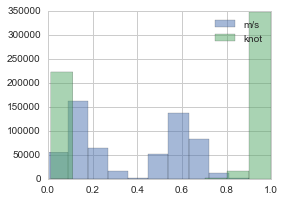

In [5]:
# Detect data stored in knot or m/s
## For data stored originally in knot, the data would cluster at 0.1 and 0.9
df['decimal'] = df.speed % 1 
df.decimal.hist(alpha=0.5, label='m/s', figsize=(4,3))
knot_unit = True if len(df.query('decimal >= 0.2'))/len(df) > 0.3 else False

# Using unit in knot instead of m/s
if knot_unit:
    df['speed']=df['speed']*1.943845
    df['decimal'] = df.speed % 1 
    df.decimal.hist(alpha=0.5,label='knot')
    # need more elaboration, some is not near an integer
    df['speed']=df['speed'].apply(lambda x: int(round(x)))
    plt.legend()

print knot_unit

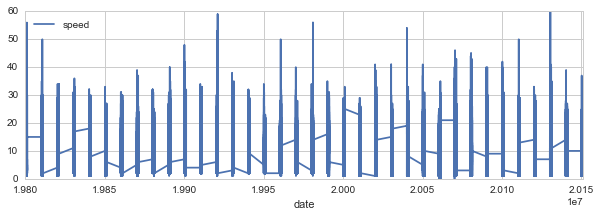

In [6]:
df['speed'].plot(legend=True,figsize=(10,3), grid=True)

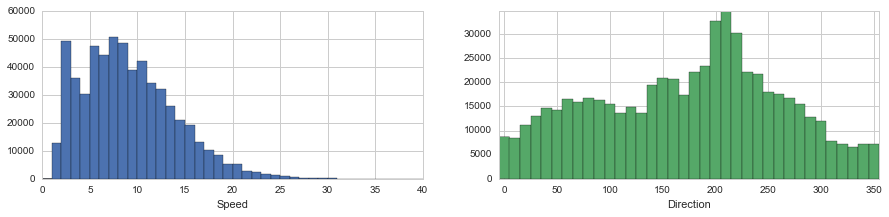

In [7]:
# Notice the gap of the distributions, so futher process needed, as below
plot_speed_and_angle_distribution(df.speed, df.dir)

## 1.3 Data Wrangling

### 1.3.1 Artefacts handling

#### 1.3.1.1 wrong direction record

In [8]:
display(df.query('dir % 10 >= 0.1'))
df = df.query('dir % 10 <= 0.1')

,date,HrMn,type,dir,speed,dir_windrose,decimal
date,,,,,,,
19921025,19921025,1750,FM-15,148,59,302,0.898504
19930405,19930405,1050,FM-15,218,20,232,0.827219
19930408,19930408,720,FM-15,339,5,111,0.859612
19930413,19930413,720,FM-15,47,8,43,0.969764
19930413,19930413,1150,FM-15,23,7,67,0.997842
19930427,19930427,1250,FM-15,69,13,21,0.829377
19931007,19931007,1150,FM-16,222,9,228,0.941687


#### 1.3.1.2 sudden increase in speed

,date,HrMn,type,dir,speed,dir_windrose,decimal,incre,incre_reverse
date,,,,,,,,,
20130409,20130409,1020,FM-15,10,60,80,0.064811,48.0,46.0
19801017,19801017,1700,FM-12,140,56,310,0.982736,40.0,43.0
19981026,19981026,500,SY-MT,190,56,260,0.982736,50.0,47.0
20040131,20040131,1500,FM-12,200,54,250,0.427660,25.0,29.0
19920819,19920819,1120,FM-15,350,53,100,0.872584,50.0,47.0
19810729,19810729,1400,FM-12,290,50,160,0.956817,45.0,45.0
19960705,19960705,100,FM-12,200,50,250,0.956817,47.0,47.0
20110515,20110515,2220,FM-15,200,50,250,0.956817,44.0,0.0
20110515,20110515,2250,FM-15,200,50,250,0.956817,0.0,44.0


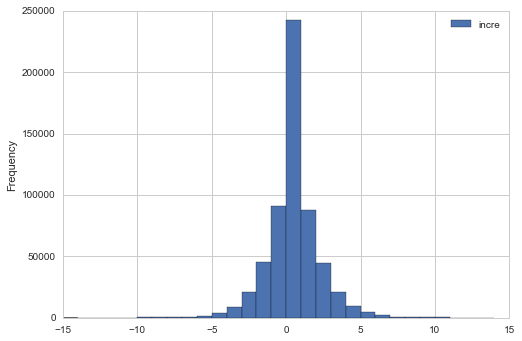

In [9]:
# sudden increse
df['incre'] = df.speed.diff(1)
df['incre'].fillna(0, inplace=True)
df['incre_reverse'] = df.speed.diff(-1)
df['incre_reverse'].fillna(0, inplace=True)

display(df.sort_values(by='speed',ascending=False).head(10))
df['incre'].plot(kind='hist', bins=arange(-15, 15), legend=True)

In [10]:
incre_threshold = 20 if knot_unit else 10
print 'sudden increase number', len(df.query('(incre > @incre_threshold )&(incre_reverse > @incre_threshold )'))
df = df.query('(incre < @incre_threshold )|(incre_reverse < @incre_threshold )')

sudden increase number 36


After Simple Aretefacts Handling

In [11]:
# Check the max speed
df.sort_values(by='speed',ascending=False).head(10)

,date,HrMn,type,dir,speed,dir_windrose,decimal,incre,incre_reverse
date,,,,,,,,,
20110515,20110515,2250,FM-15,200,50,250,0.956817,0.0,44.0
20110515,20110515,2220,FM-15,200,50,250,0.956817,44.0,0.0
19900125,19900125,1300,FM-12,230,48,220,0.012971,0.0,5.0
19900125,19900125,1250,FM-15,230,48,220,0.012971,4.0,0.0
19900125,19900125,1150,FM-15,230,46,220,0.069127,6.0,0.0
19900125,19900125,1200,FM-12,230,46,220,0.874742,0.0,2.0
20080310,20080310,520,FM-15,260,44,190,0.930897,16.0,0.0
20080310,20080310,550,FM-15,260,44,190,0.930897,0.0,11.0
19900125,19900125,1220,FM-15,240,44,210,0.125281,-2.0,-4.0


#### 1.3.1.3 re-distribute angle, for un-evenly sectored data
For some dataset, the 16 sectors are not record properly,

e.g. the sectors are [0,20,30,50], need to redistribute the angle into 22.5

In [12]:
df['dir'].value_counts().sort_index()

0       8698
10      8403
20     11065
30     13017
40     14599
50     14258
60     16602
70     15883
80     16856
90     16321
100    15480
110    13638
120    14925
130    13582
140    19537
150    20876
160    20728
170    17473
180    22187
190    23416
200    32767
210    34717
220    30208
230    22174
240    21779
250    18080
260    17623
270    16780
280    15561
290    12849
300    11953
310     7909
320     7131
330     6652
340     7305
350     7180
Name: dir, dtype: int64

In [13]:
effective_coloumn = df['dir'].value_counts()[df['dir'].value_counts() > 30].sort_index()

if len(effective_coloumn) == 16:
    # For some dataset, the angle is not evenly distributed, so there is a need to redistribute
    original_angle = list(effective_coloumn.sort_index().index)
    redistributed_angle = linspace(0,360,num=17)[:-1]
    df['dir'].replace(to_replace=original_angle, value=redistributed_angle, inplace=True)
    display(df['dir'].value_counts().sort_index())

SECTOR_LENGTH = 360/len(effective_coloumn)
print len(effective_coloumn), SECTOR_LENGTH

36 10.0


### 1.3.2 Sampling Type Selection

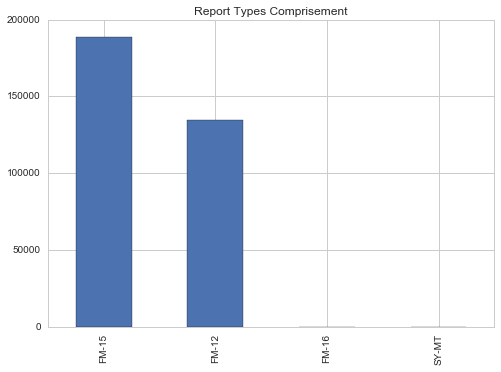

In [14]:
sample_type = df.query('date > 20000000')['type']
sample_type.value_counts().plot(
    kind = 'bar', title = 'Report Types Comprisement')

report_type_most_used = sample_type.value_counts().argmax()
df = df.query("type==@report_type_most_used")

### 1.3.3 Sampling Time Selection

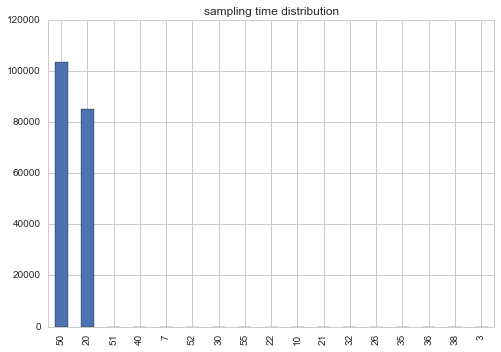

In [15]:
df['sample_time'] = df.HrMn % 100 
sample_time = df.query('date > 20000000')['sample_time']
sample_time.value_counts().plot(
    kind = 'bar', title = 'sampling time distribution')

sampling_time_most_used = sample_time.value_counts().argmax()
df = df.query("sample_time==@sampling_time_most_used")
df.drop(['sample_time'], 1,inplace=True)

In [16]:
df['HrMn'].value_counts().sort_index()

50      2195
150     1615
250      947
350     2699
450     4318
550     6465
650     8466
750     8946
850     9082
950     9257
1050    9411
1150    9586
1250    9693
1350    9784
1450    9756
1550    9765
1650    9814
1750    9727
1850    9555
1950    9347
2050    6627
2150    4298
2250    3141
2350    2270
Name: HrMn, dtype: int64

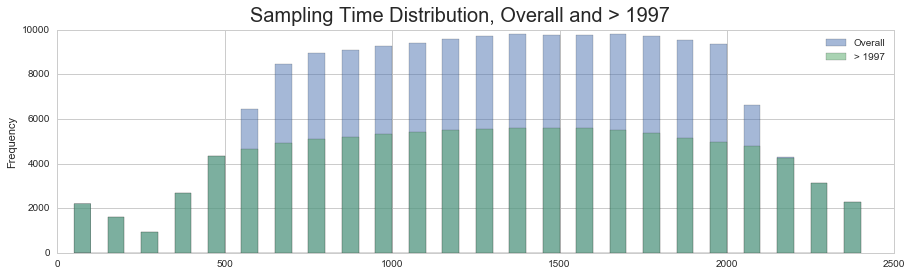

In [17]:
MID_YEAR = int(((min(df.date)+max(df.date))/2 )/10000)
# Ensure data sampled equally
bins=arange(min(df.HrMn), max(df.HrMn) + 100, 50)

df['HrMn'].plot(
    kind='hist', alpha=0.5,figsize=(15, 4),bins=bins, label='Overall')

df.query('date > @MID_YEAR * 10000')['HrMn'].plot(
    kind='hist', alpha=0.5,figsize=(15, 4),bins=bins, label='> %s' %  MID_YEAR )

plt.suptitle('Sampling Time Distribution, Overall and > %s ' %  MID_YEAR, fontsize = 20)
plt.legend()

### 1.3.4 Re-distribute Direction and Speed
e.g. Dir 50 -> -45 ~ 55, to make KDE result better

In [18]:
DIR_REDISTRIBUTE = 'even'
if DIR_REDISTRIBUTE == 'even':
    DIR_BIN = arange(-5, 360, 10) 
elif DIR_REDISTRIBUTE == 'round_up':
    DIR_BIN = arange(0, 360+10, 10) 

def randomize_angle(df, sector_length = 10):
    if DIR_REDISTRIBUTE == 'even':
        df['dir_ran'] = df['dir'].apply(lambda x: (x + np.random.uniform(-sector_length/2,sector_length/2)))
    else:
        df['dir_ran'] = df['dir'].apply(lambda x: (x + np.random.uniform(0,sector_length)))

    bins=arange(0, 360+10, 5)
    df['dir'].hist(bins=bins, alpha=0.5)
    bins=arange(0, 360+10, 1)
    df['dir_ran'].hist(bins=bins, alpha=0.5,figsize=(15, 4))
    
    df['dir']=df['dir_ran']
    df.drop(['dir_ran'], 1,inplace=True)
    return df

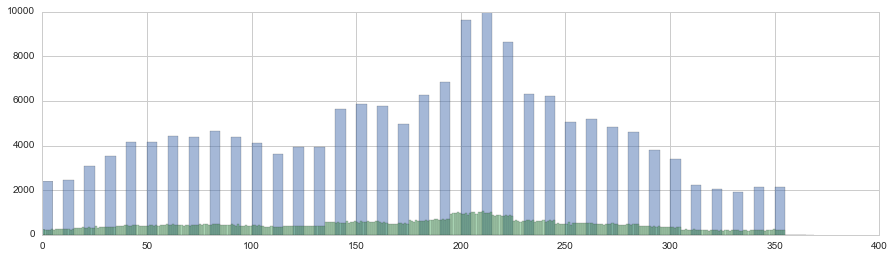

In [19]:
# Randomize the angle degree, to form a better KDE estimation
df = randomize_angle(df, SECTOR_LENGTH)

In [20]:
def randomize_speed(df):
    # Round down speed, need more caution
    df['speed_ran'] = df['speed'].apply(lambda x: (x + np.random.uniform(-1,0)) if x > 0 else x)
    
    max_speed = df.speed.max()
    df['speed'].hist(bins=arange(0, max_speed), alpha=0.5)
    df['speed_ran'].hist(bins=arange(0, max_speed, 0.5), alpha=0.5,figsize=(15, 4))
    
    df['speed']=df['speed_ran']
    df.drop(['speed_ran'], 1,inplace=True)
    return df

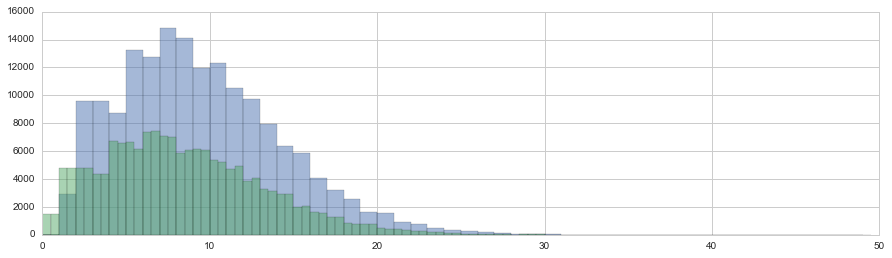

In [21]:
# Each original cell is split between the value, # so the peak is shift left
# e.g. 2 -> (1.5,2), (2,2.5); or 3 -> (2,3)
df = randomize_speed(df)

### 1.3.5 Generate (x,y) from (speed,dir)

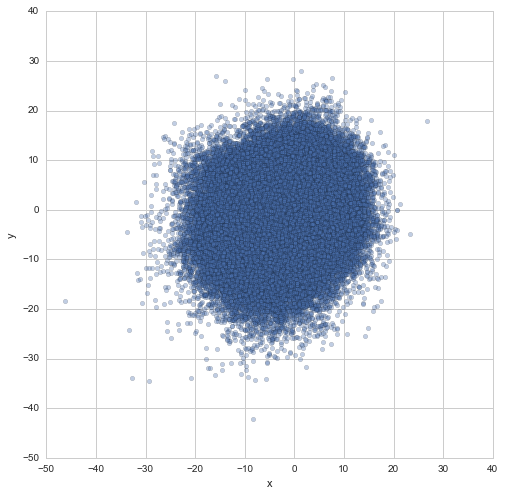

In [22]:
df['x'] = df['speed'] * cos(df['dir'] * pi / 180.0)
df['y'] = df['speed'] * sin(df['dir'] * pi / 180.0)
fig, ax = plt.subplots(figsize=(8, 8), dpi=80)
ax.set_aspect('equal')
df.plot(kind='scatter', x='x', y='y', alpha=0.35, ax=ax)

## 1.4 Time Shift Comparison

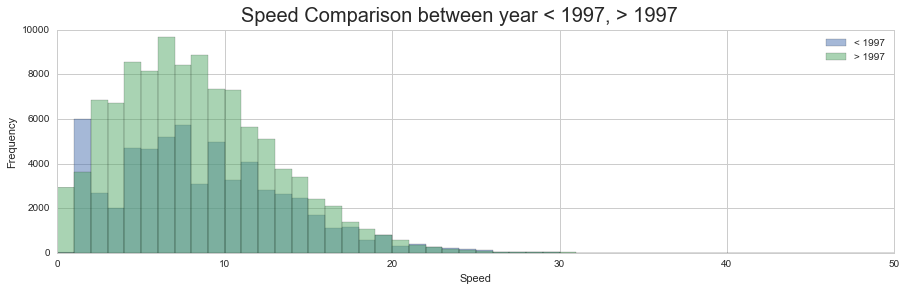

In [23]:
# Comparison between mid_year, looking for: 
# 1. Odd Even Bias
# 2. Time Shift of Wind Speed Distribution
bins = arange(0, max(df.speed) + 1)
df.query('date < @MID_YEAR * 10000')['speed'].plot(
    kind='hist', alpha=0.5,figsize=(15, 4),bins=bins, label='< %s' % MID_YEAR)

df.query('date > @MID_YEAR * 10000')['speed'].plot(
    kind='hist', alpha=0.5,figsize=(15, 4),bins=bins, label='> %s' % MID_YEAR)

plt.xlabel("Speed")
plt.suptitle('Speed Comparison between year < %s, > %s ' % (MID_YEAR, MID_YEAR), fontsize = 20)
plt.legend()

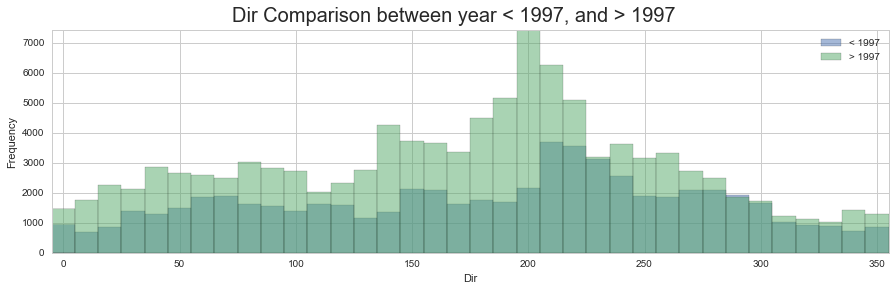

In [24]:
df.query('date < @MID_YEAR * 10000')['dir'].plot(
    kind='hist', alpha=0.5,bins=DIR_BIN, label='< %s' % MID_YEAR)

df.query('date > @MID_YEAR * 10000')['dir'].plot(
    kind='hist', alpha=0.5,figsize=(15, 4),bins=DIR_BIN, label='> %s' % MID_YEAR)

plt.xlabel("Dir")
plt.suptitle('Dir Comparison between year < %s, and > %s ' % (MID_YEAR, MID_YEAR), fontsize = 20)
plt.axis('tight')
plt.legend()

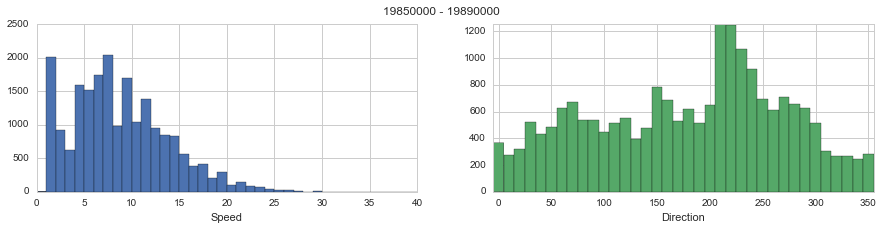

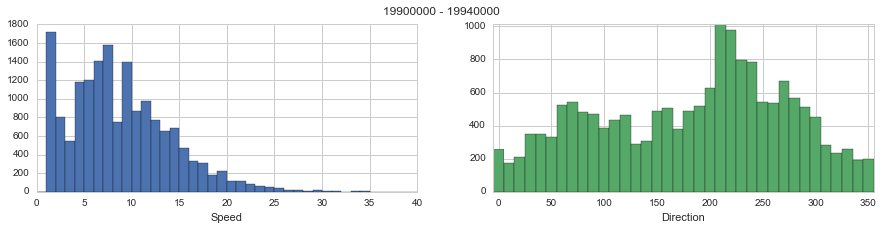

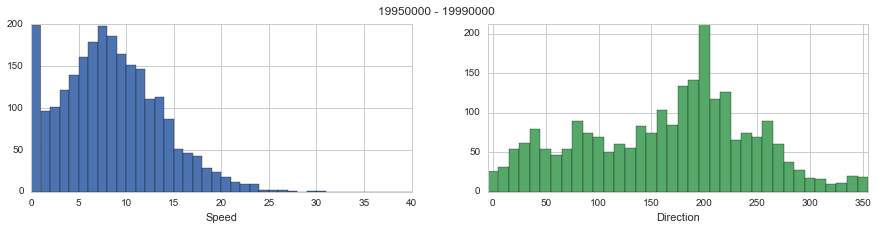

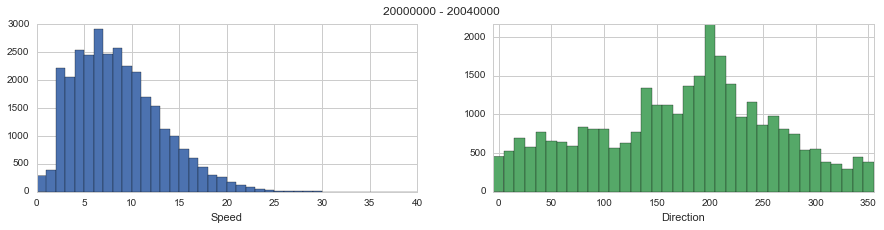

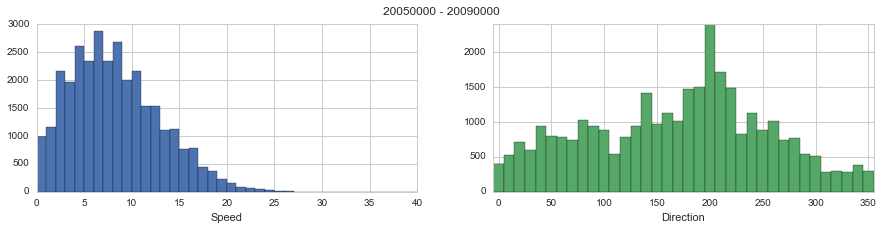

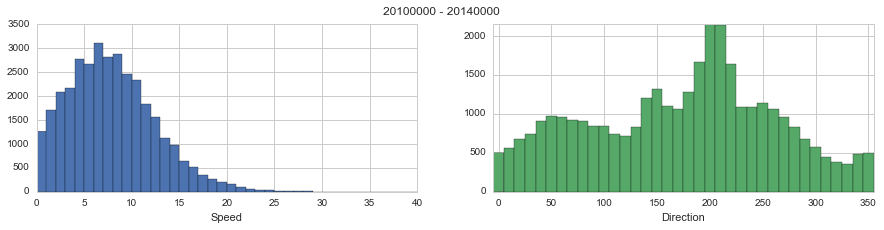

In [25]:
# Inspect the time shift of speed and degree distribution, and odd-even bias
def check_time_shift(df):
    for start_time in xrange(19850000, 20150000, 50000):
        end_time = start_time + 50000 
        sub_df = df.query('(date >= @start_time) & (date < @end_time)')
        if len(sub_df) > 0 :
            title = '%s - %s' %(start_time, end_time-10000)
            plot_speed_and_angle_distribution(sub_df.speed, sub_df.dir, title)
        
check_time_shift(df)

## 1.5 Re-select data, and overview of the clean dataset

In [26]:
## Summery of the data selection
print 'incre_threshold for artefact detect:', incre_threshold
print 'Report type used:', report_type_most_used
print 'Sampling time used:', sampling_time_most_used

df_all_years = df
df = df.query('(date >= 20100000) & (date < 20150000)')
df.describe()

incre_threshold for artefact detect: 20
Report type used: FM-15
Sampling time used: 50


,date,HrMn,dir,speed,dir_windrose,decimal,incre,incre_reverse,x,y
count,3.425600e+04,34256.000000,34256.000000,34256.000000,34256.000000,34256.000000,34256.00000,34256.000000,34256.000000,34256.000000
mean,2.012072e+07,1266.694886,172.497798,7.916374,193.410497,0.574109,0.02277,0.018566,-2.333922,-0.804347
std,1.411631e+04,605.724702,87.774362,4.606013,101.201778,0.445592,1.90247,0.969814,6.339002,6.132607
min,2.010010e+07,50.000000,-4.976931,0.002234,0.000000,0.019445,-46.00000,-12.000000,-46.237127,-30.962398
25%,2.011041e+07,750.000000,101.538592,4.471691,110.000000,0.053997,-1.00000,0.000000,-6.614657,-4.894163
50%,2.012063e+07,1250.000000,185.195893,7.466404,220.000000,0.913609,0.00000,0.000000,-2.009820,-0.368317
75%,2.013100e+07,1750.000000,234.221619,10.731116,270.000000,0.967607,1.00000,0.000000,1.664433,3.298309
max,2.014123e+07,2350.000000,354.972714,49.787299,350.000000,0.997842,19.00000,44.000000,20.652215,23.249081


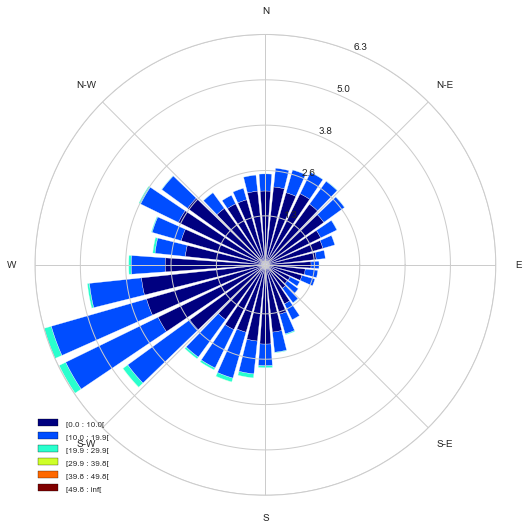

In [27]:
# 90 degree is in east
ax = WindroseAxes.from_ax()
ax.bar(df.dir_windrose, df.speed, normed=True, opening=0.8, edgecolor='white', nsector=36)
ax.set_legend()

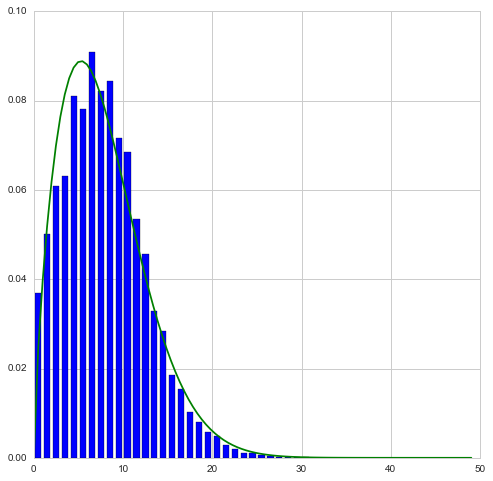

In [28]:
ax, _params = WindAxes.from_ax().pdf(df.speed, 
                                     bins=arange(0, max(df.speed)))
weibull_params = sp.stats.exponweib.fit(df.speed, floc=0, f0=1)

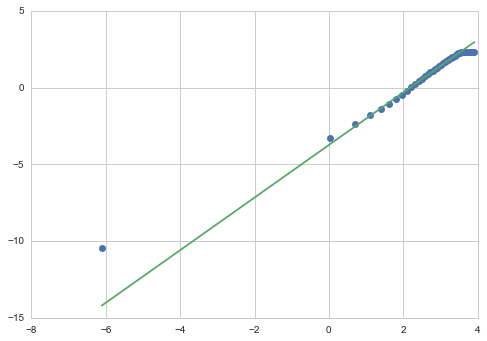

In [29]:
sample = df.speed
ecdf = sm.distributions.ECDF(sample)

x = linspace(min(sample), max(sample))
y = ecdf(x)
plt.plot(log(x), log(-log(1-y)),'o')

w_scale, c_shape = weibull_params[1], weibull_params[3]
qz=exp(-(x/c_shape)**w_scale)
plt.plot(log(x), log(-log(qz)),'-')

# 2. Create input data, i.e. speed_set

In [30]:
# speed_set = array(zip(-df.x, -df.y)) # Adjust the direction to match for Cook's paper
SPEED_SET = array(zip(df.x, df.y))
max_speed = df.speed.max()
NUMBER_OF_GAUSSIAN = 3
FIT_METHOD = 'square_error'
DEFAULT_BANDWDITH = 1.5 if knot_unit else 0.7

In [31]:
FITTING_RANGE = []
fit_limit = ceil(df['speed'].quantile(.95))
plot_limit = ceil(df['speed'].quantile(.975))
fitting_axis_range = arange(-fit_limit, fit_limit+1, 1)
PLOT_AXIS_RANGE = arange(-plot_limit, plot_limit+1, 1)
    
for i in fitting_axis_range:
    for j in fitting_axis_range:
        FITTING_RANGE.append([i,j])
        
print fitting_axis_range

[-17. -16. -15. -14. -13. -12. -11. -10.  -9.  -8.  -7.  -6.  -5.  -4.  -3.
  -2.  -1.   0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.
  13.  14.  15.  16.  17.]


# 3. Kernel Density Estimation

In [32]:
sample = SPEED_SET

In [33]:
# The bandwidth value sometimes would be too radical
from sklearn.grid_search import GridSearchCV

if knot_unit:
    bandwidth_range = arange(0.5,2,0.2)
else:
    bandwidth_range = arange(0.4,1,0.1)

grid = GridSearchCV(neighbors.KernelDensity(),
                    {'bandwidth': bandwidth_range},
                    n_jobs=-1, cv=4) 
grid.fit(sample)
bandwidth = grid.best_params_['bandwidth']

In [34]:
if 'bandwidth' not in globals():
    bandwidth = DEFAULT_BANDWDITH 

kde = neighbors.KernelDensity(bandwidth=bandwidth).fit(sample)

points = FITTING_RANGE
# very slow if the dataset is too large, e.g. 100,000
# kde returns log prob, need to convert it
kde_result = exp(kde.score_samples(points))
print 'bandwidth:', bandwidth, len(kde_result)
print kde_result[:5]

bandwidth: 1.1 1225
[  1.87158309e-05   3.66937623e-05   5.91713498e-05   8.01931541e-05
   1.04970218e-04]


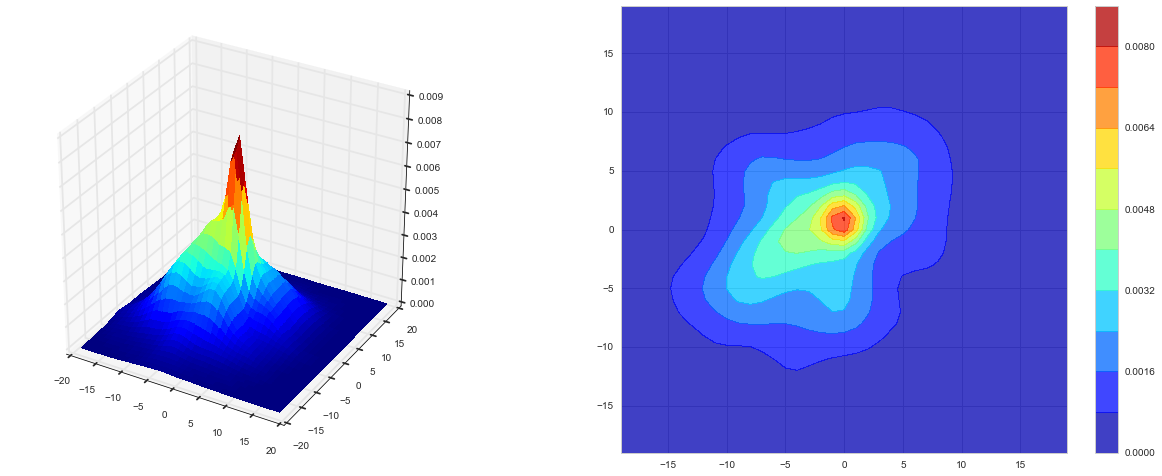

In [35]:
# Plot jPDF
X = Y = PLOT_AXIS_RANGE
# Can't work if pass as generate_Z_from_X_Y(X,Y, exp(kde.score_samples())), need to use lambda
# see http://stackoverflow.com/questions/21035437/passing-a-function-as-an-argument-in-python
kde_Z = generate_Z_from_X_Y(X,Y, lambda coords: exp(kde.score_samples(coords)))

fig = plt.figure(figsize=(22,8))
ax1 = fig.add_subplot(1,2,1, projection = '3d')
plot_3d_prob_density(X,Y,kde_Z,ax1)
ax2 = fig.add_subplot(1,2,2)
plot_2d_prob_density(X,Y,kde_Z,ax2)

In [36]:
kde_cdf = cdf_from_pdf(kde_result)

# 4. GMM Estimation, using EM algo

In [37]:
sample= SPEED_SET
clf = mixture.GMM(n_components=NUMBER_OF_GAUSSIAN, covariance_type='full')
clf.fit(sample)
print clf.converged_

True


In [38]:
gmm_em_result = read_gmm_em_result(clf)
pretty_print_gmm(gmm_em_result)  

,weight,mean_x,mean_y,sig_x,sig_y,corr
1,0.390361,0.386489,2.145007,4.952343,4.680339,0.346574
2,0.349591,-6.522614,-0.916707,5.598072,5.745253,0.221359
3,0.260048,-0.786561,-5.080611,6.203671,6.000417,0.099117


GMM Plot Result
0.390360992774 [[ 0.38648898  2.14500744]] [ 3.88283322  5.59954314] -49.6312071138
0.349591284596 [[-6.52261432 -0.91670743]] [ 5.00049917  6.27226887] 138.343737564
0.260047722629 [[-0.78656118 -5.08061086]] [ 5.77518933  6.41386996] -54.2901279702


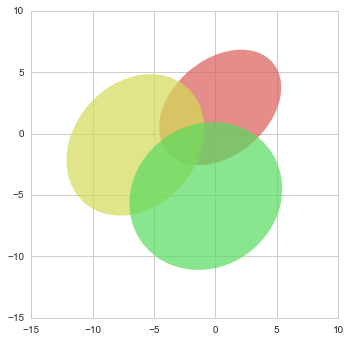

In [39]:
plot_gmm_ellipses(gmm_em_result)

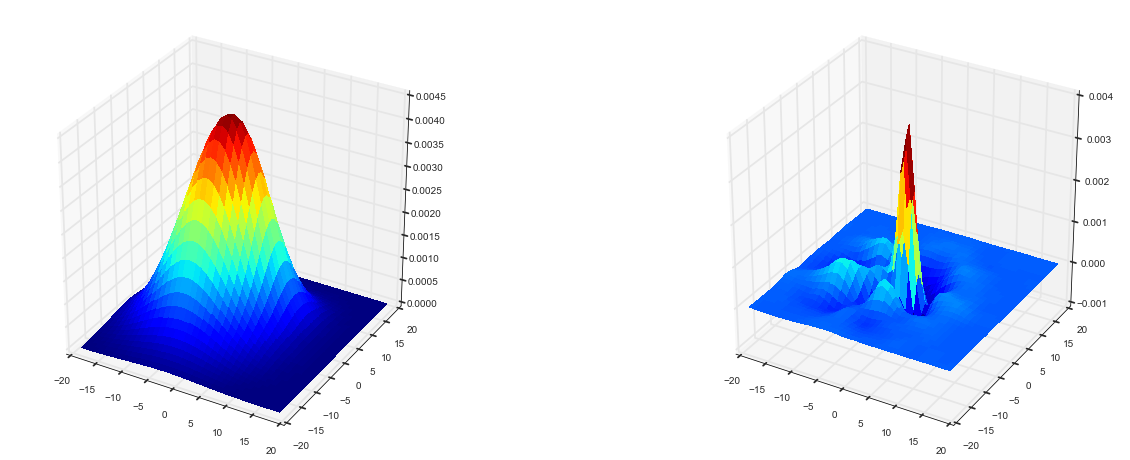

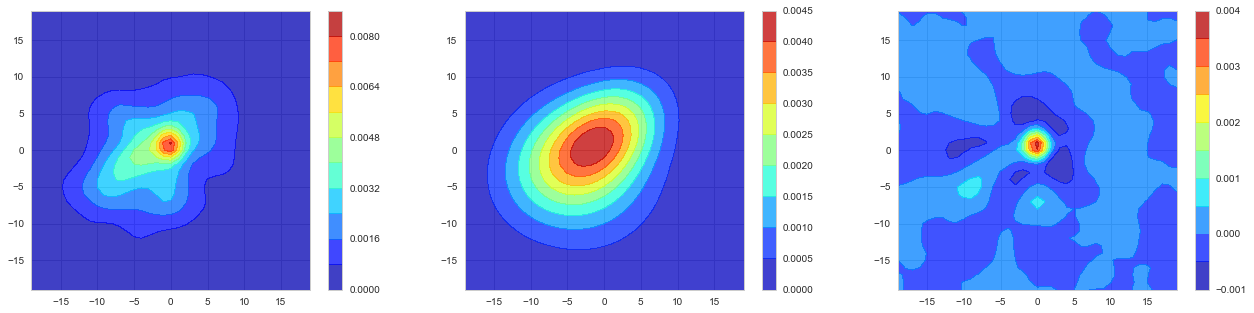

In [40]:
X = Y = PLOT_AXIS_RANGE
pdf_Z = generate_Z_from_X_Y(X,Y, lambda coords: exp(clf.score_samples(coords)[0]))

def residule_between_kde_and_gmm(points):
    kde_vals = exp(kde.score_samples(points))
    gmm_vals = exp(clf.score_samples(points)[0])
    return kde_vals - gmm_vals 

residual_Z = generate_Z_from_X_Y(X,Y, residule_between_kde_and_gmm)

fig = plt.figure(figsize=(22,8))
ax1 = fig.add_subplot(1,2,1, projection = '3d')
plot_3d_prob_density(X,Y,pdf_Z,ax1)
ax2 = fig.add_subplot(1,2,2,projection = '3d')
plot_3d_prob_density(X,Y,residual_Z,ax2)

fig = plt.figure(figsize=(22,5))
ax1 = fig.add_subplot(1,3,1)
plot_2d_prob_density(X,Y,kde_Z,ax1)
ax2 = fig.add_subplot(1,3,2)
plot_2d_prob_density(X,Y,pdf_Z,ax2)
ax3 = fig.add_subplot(1,3,3)
plot_2d_prob_density(X,Y,residual_Z,ax3)

## GMM, EM VS. KDE

In [41]:
points = FITTING_RANGE
gmm_pdf_result = exp(clf.score_samples(points)[0])
# put into Pandas to make it looks better
pretty_pd_display([goodness_of_fit_summary(gmm_pdf_result, kde_result)])

,Chi_square,K_S,MSE,RMSE / Max,RMSE / Mean,R_square
0,0.050773,0.018182,9.497151e-08,0.038071,0.385291,0.923501


# 5. Least Square Prob Estimation

In [42]:
sample = SPEED_SET
points = FITTING_RANGE

In [43]:
# from GMM,EM 
# GMM format: weight, meanx, meany, sigx, sigy, rho
x0 = gmm_em_result

cons = [
        # sum of every 6th element, which is the fraction of each gaussian
        {'type': 'eq', 'fun': lambda x: sum(x[::6]) - 1},
        # # limit the width/height ratio of elliplse, optional
        # {'type': 'ineq', 'fun': lambda x: width_height_ratios_set(x) - 1/3},
        # {'type': 'ineq', 'fun': lambda x: 3 - width_height_ratios_set(x)},
]

bonds = [(0., 0.99),(-fit_limit, fit_limit),(-fit_limit, fit_limit),
         (0., fit_limit),(0., fit_limit),(-0.99, 0.99)]*int(len(x0)/6)

result = sp.optimize.minimize(
    lambda x0: GMM_fit_score(x0, kde_result, points,FIT_METHOD),
    x0,
    bounds = bonds,
    constraints=cons,
    tol = 0.000000000001,
    options = {"maxiter": 500})
result

     fun: -17.896848285545538
     jac: array([ -5.87081671e-01,   1.19209290e-06,   7.15255737e-07,
         4.76837158e-07,   0.00000000e+00,   2.38418579e-07,
        -5.87100506e-01,   2.38418579e-07,   0.00000000e+00,
         0.00000000e+00,   2.38418579e-07,  -7.15255737e-07,
        -5.87100506e-01,   0.00000000e+00,   2.38418579e-07,
        -2.38418579e-07,   2.38418579e-07,   7.15255737e-07,
         0.00000000e+00])
 message: 'Optimization terminated successfully.'
    nfev: 1365
     nit: 67
    njev: 67
  status: 0
 success: True
       x: array([  4.28539278e-02,  -1.10588738e-01,   6.32394494e-01,
         1.20886885e+00,   1.25155008e+00,  -5.92054785e-03,
         1.60848977e-01,  -2.92918832e+00,   1.43337622e-01,
         6.99361898e+00,   5.17696079e+00,   8.82497119e-01,
         7.96297095e-01,  -2.39530905e+00,  -8.85516764e-01,
         6.49627851e+00,   6.67005327e+00,   1.33828278e-01])

## 5.1 GMM Result

In [44]:
gmm = group_gmm_param_from_gmm_param_array(result.x, sort_group = True)
mixed_model_pdf = generate_gmm_pdf_from_grouped_gmm_param(gmm)
gmm_pdf_result = mixed_model_pdf(points)

pretty_print_gmm(gmm)

,weight,mean_x,mean_y,sig_x,sig_y,corr
1,0.796297,-2.395309,-0.885517,6.496279,6.670053,0.133828
2,0.160849,-2.929188,0.143338,6.993619,5.176961,0.882497
3,0.042854,-0.110589,0.632394,1.208869,1.251550,-0.005921


GMM Plot Result
0.796297094764 [[-2.39530905 -0.88551676]] [ 6.11841549  7.01827878] 140.579959357
0.160848977457 [[-2.92918832  0.14333762]] [ 2.01146645  8.46555563] -54.5425706271
0.0428539277794 [[-0.11058874  0.63239449]] [ 1.20855505  1.2518531 ] -175.159335426


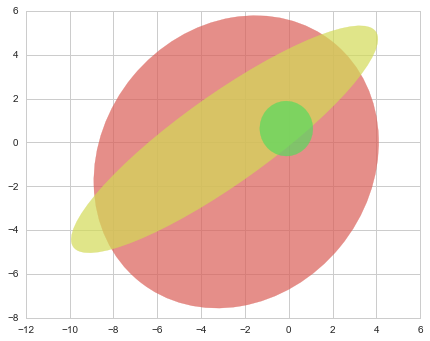

In [45]:
plot_gmm_ellipses(gmm)

## 5.2 Goodness-of-fit indicators

In [46]:
pretty_pd_display([goodness_of_fit_summary(gmm_pdf_result, kde_result)])

,Chi_square,K_S,MSE,RMSE / Max,RMSE / Mean,R_square
0,0.024595,0.009663,1.688486e-08,0.016053,0.162458,0.986399


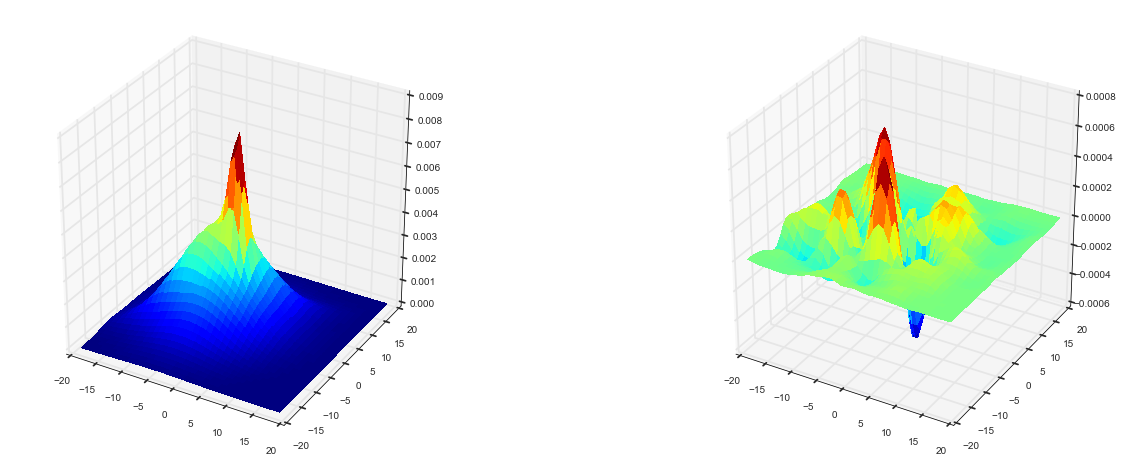

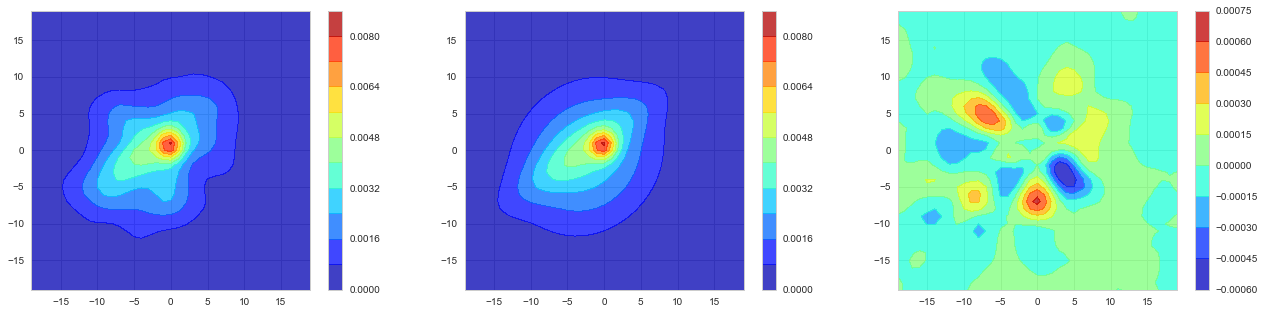

In [47]:
X = Y = PLOT_AXIS_RANGE
pdf_Z = generate_Z_from_X_Y(X,Y, mixed_model_pdf)# passing a function as an argument

def residule_between_kde_and_gmm(points):
    kde_vals = exp(kde.score_samples(points))
    gmm_vals = mixed_model_pdf(points)
    return kde_vals - gmm_vals 

residual_Z = generate_Z_from_X_Y(X,Y, residule_between_kde_and_gmm)

fig = plt.figure(figsize=(22,8))
ax1 = fig.add_subplot(1,2,1, projection = '3d')
plot_3d_prob_density(X,Y,pdf_Z,ax1)
ax2 = fig.add_subplot(1,2,2,projection = '3d')
plot_3d_prob_density(X,Y,residual_Z,ax2)

fig = plt.figure(figsize=(22,5))
ax1 = fig.add_subplot(1,3,1)
plot_2d_prob_density(X,Y,kde_Z,ax1)
ax2 = fig.add_subplot(1,3,2)
plot_2d_prob_density(X,Y,pdf_Z,ax2)
ax3 = fig.add_subplot(1,3,3)
plot_2d_prob_density(X,Y,residual_Z,ax3)

In [48]:
def f(V,theta):
    return (mixed_model_pdf([[V*cos(theta),V*sin(theta)]]))*V

x_vals_OEN3_LMSE  = arange(0, max_speed)
y_vals_OEN3_LMSE =[integrate.nquad(f, [[0, x_val],[0, 2*pi]]) for x_val in x_vals_OEN3_LMSE ]

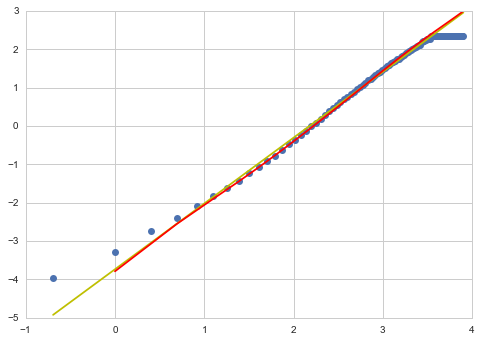

In [49]:
x = arange(0, max_speed, 0.5)

# 1. Plot v-p points, empirical distribution
ecdf = sm.distributions.ECDF(df.speed)
y = ecdf(x)
plt.plot(log(x), log(-log(1-y)),'o')

# 2. Weibull distribution
w_scale, c_shape = weibull_params[1], weibull_params[3]
qz=exp(-(x/c_shape)**w_scale)
plt.plot(log(x), log(-log(qz)),'-', color = 'y')

# 3. OEN3 distribution
x, y_ = x_vals_OEN3_LMSE, y_vals_OEN3_LMSE
y = array(zip(*y_)[0])
plt.plot(log(x), log(-log(1-y)),'-', color = 'r')

plt.show()

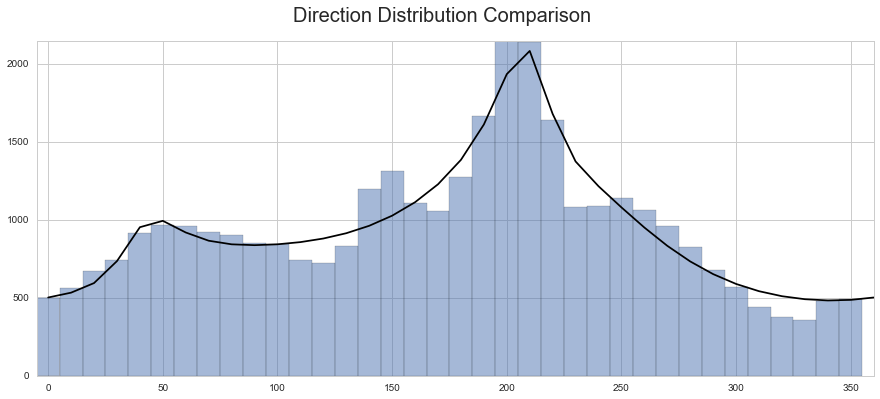

In [50]:
# Calculate Angle Distribution
x_vals = linspace(0,2*pi, num=36+1)
y_vals_ =[integrate.nquad(f, [[0, inf],[x_val-pi/36, x_val+pi/36]]) for x_val in x_vals]

# 1. integrate.nquad returns 2 vaule, result, abserr. Need to abstract the first to plot
# 2. * length of data size, to adjust the plot space
y_vals = array(zip(*y_vals_)[0])*len(df['dir']) 

df['dir'].hist(bins=DIR_BIN, alpha=0.5,figsize=(15, 6))

plt.plot(x_vals/pi*180, y_vals,'-', color='black')
plt.suptitle('Direction Distribution Comparison', fontsize = 20)
plt.axis('tight')
plt.show()

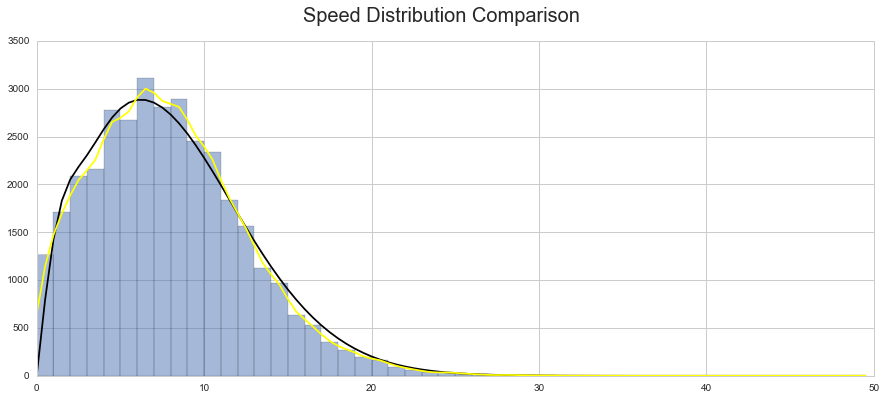

In [51]:
# Calculate Speed Distribution
# 1. GMM Model
x_vals = arange(0, max_speed, 0.5)
y_vals_ =[integrate.nquad(f, [[x_val-0.1, x_val+0.1],[0, 2*pi]]) for x_val in x_vals]
y_vals = array(zip(*y_vals_)[0])*len(df.speed)/0.2
plt.plot(x_vals, y_vals,'-', color='black')

# 2. Observation
df['speed'].hist(bins=arange(0, max_speed), alpha=0.5,figsize=(15, 6))

# 3. 1d KDE
sample = array(df.speed).reshape(-1, 1)
kde_temp = neighbors.KernelDensity(bandwidth=0.5).fit(sample) 
y_vals = [exp(kde_temp.score_samples(x_val))*len(sample) for x_val in x_vals]
plt.plot(x_vals, y_vals,'-', color='yellow')

plt.suptitle('Speed Distribution Comparison', fontsize = 20)
plt.show()

## 5.3 Sectoral Comaprison

In [52]:
# Calculate Speed Distribution
def model_data_comparison(df, original_incre = 10, incre = 10):
    start, end = -original_incre/2 + incre/2, 360
    max_diff_array = []
    max_speed = df.speed.max()
    
    # Find a max count for plotting histogram
    max_count = max_count_for_angles(df, start, end, incre)
    hist_y_axis = [0, max_speed, 0, max_count]
    
    for angle in arange(start, end, incre):
        angle_radian, incre_radian = radians(angle), radians(incre)  
        start_angle, end_angle = angle-incre/2, angle+incre/2
        
        # Select data from observation
        sub_df, sub_max_speed = select_df_by_angle(df, start_angle, end_angle)
        direction_prob = integrate.nquad(f, 
                                         [[0, inf],
                                          [angle_radian-incre_radian/2, angle_radian+incre_radian/2]])
        
        # 1. Count Comparison
        # 1.1. Data Histogram
        fig = plt.figure(figsize=(22,4))
        ax1 = fig.add_subplot(1,3,1)        
        sub_df['speed'].hist(bins=arange(0, sub_max_speed), alpha=0.5)
        plt.axis(hist_y_axis)
        
        # 1.2. Model Distribution
        x_vals = linspace(0, sub_max_speed, 20)
        y_vals_ =[integrate.nquad(f, 
                  [[x_val-0.1, x_val+0.1],
                   [angle_radian-incre_radian/2, angle_radian+incre_radian/2]]) 
                  for x_val in x_vals]
        y_vals = array(zip(*y_vals_)[0])/direction_prob[0] * len(sub_df.speed)/0.2
        plt.plot(x_vals, y_vals,'-', color='black')
        
        # 2. CDF Comaprison
        x = linspace(0, sub_max_speed, 20)
        # 2.1. Data's empirical distribution
        ecdf = sm.distributions.ECDF(sub_df.speed)
        y_cdf = ecdf(x)
        
        # 2.2. Model
        y_ =[integrate.nquad(f, [[0, x_val],[angle_radian-incre_radian/2, angle_radian+incre_radian/2]]) 
             for x_val in x]
        y_gmm = array(zip(*y_)[0])/direction_prob[0]
                
        # 2.3.1. Plot in ordinary axis
        ax3 = fig.add_subplot(1,3,2)
        plt.plot(x, y_cdf,'o')
        plt.plot(x, y_gmm,'-', color = 'r')
        
        # 2.3.2. Weibull plot
        ax4 = fig.add_subplot(1,3,3)
        plt.plot(log(x), log(-log(1-y_cdf)),'o')
        plt.plot(log(x), log(-log(1-y_gmm)),'-', color = 'r')
        
        plt.suptitle('%s (%s - %s) Degree Speed Distribution Comparison' % (angle, start_angle, end_angle), 
                     fontsize = 15)
        plt.show()
        
        diff = abs(y_cdf - y_gmm)
        max_diff_array.append([angle, diff.max(), x[diff.argmax()]])
        print 'data size:', len(sub_df)
        print 'max diff:', diff.max(), ', speed value:', x[diff.argmax()], 'y gmm', y_gmm[diff.argmax()],
    return max_diff_array

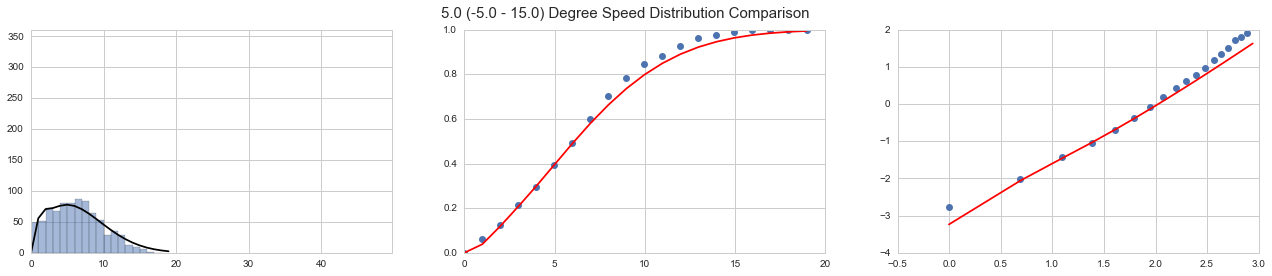

data size: 809
max diff: 0.0487656780313 , speed value: 9.97522873979 y gmm 0.797958673019

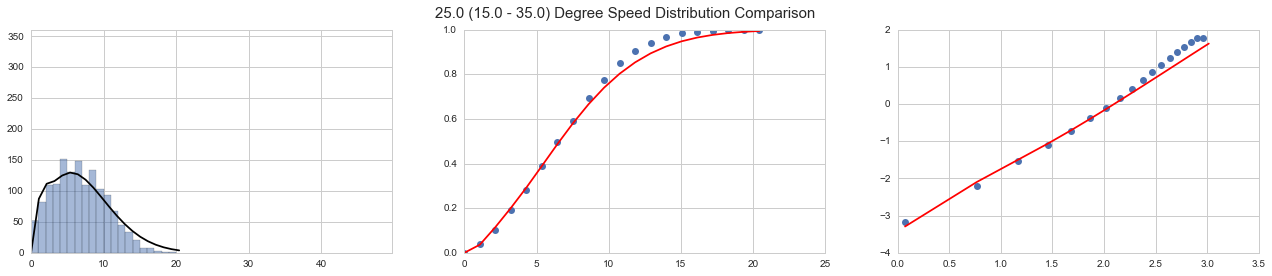

 data size: 1418
max diff: 0.0501400724281 , speed value: 11.8231473733 y gmm 0.853244976937

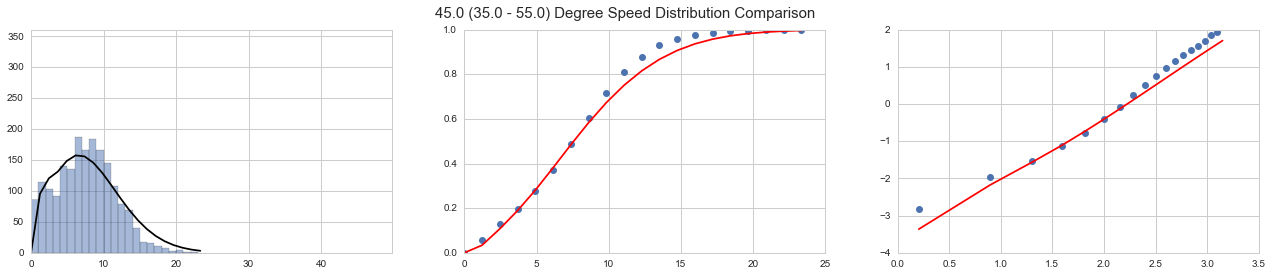

 data size: 1882
max diff: 0.0620830830642 , speed value: 12.2818971757 y gmm 0.815175152855

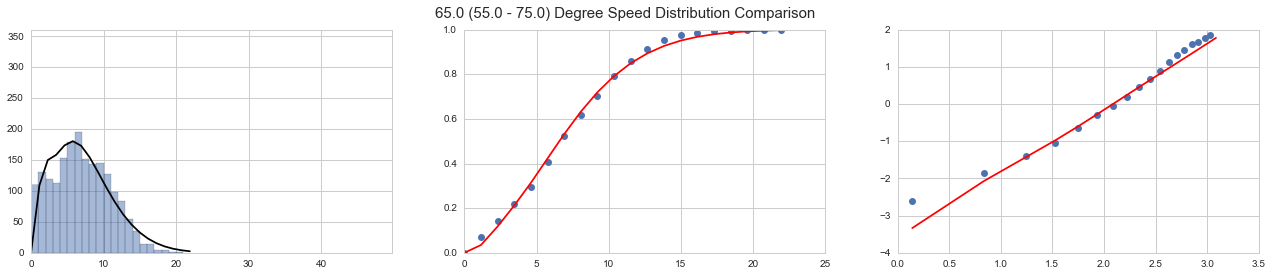

 data size: 1884
max diff: 0.036686816598 , speed value: 1.15231440662 y gmm 0.0349692343574

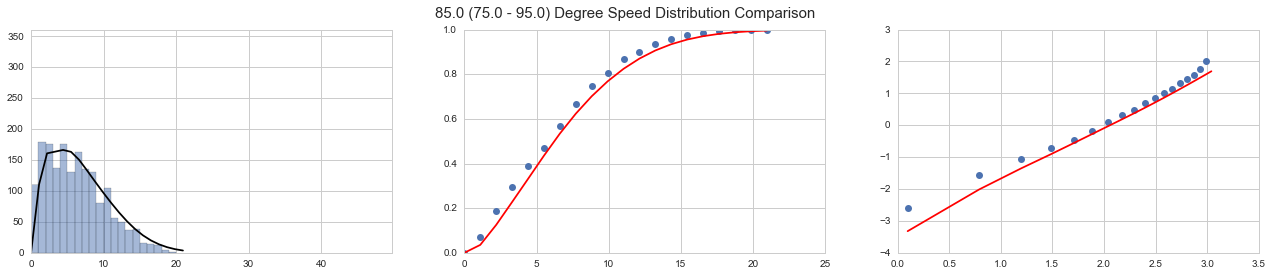

 data size: 1755
max diff: 0.0688208786484 , speed value: 3.30651365715 y gmm 0.227475417648

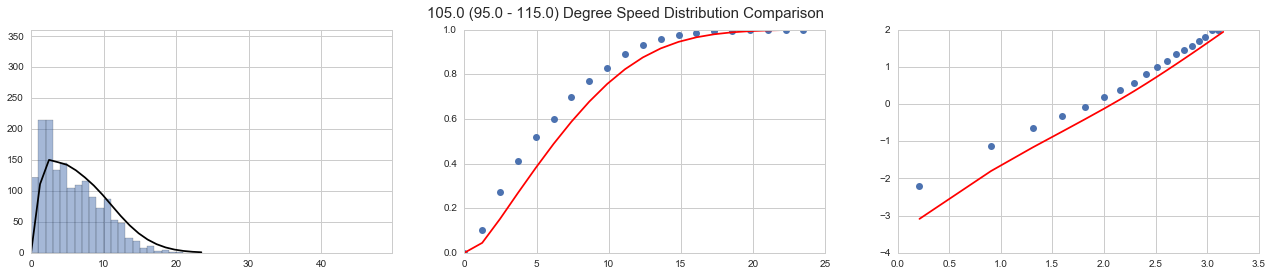

 data size: 1588
max diff: 0.142160334671 , speed value: 3.70774837919 y gmm 0.267789287495

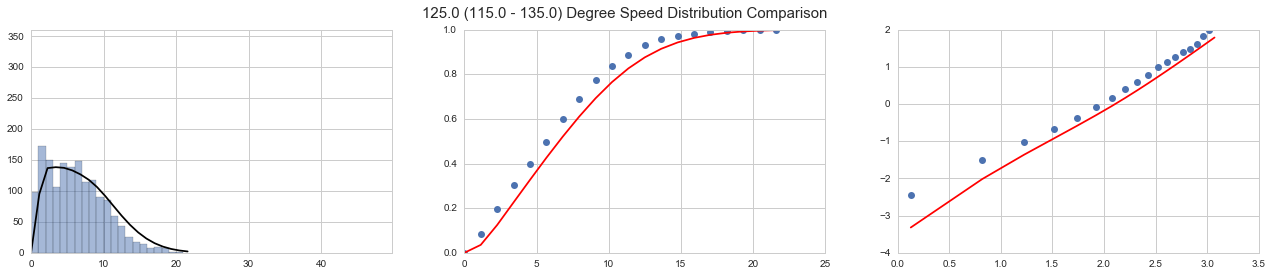

 data size: 1556
max diff: 0.0826024249236 , speed value: 9.08842846908 y gmm 0.692461842429

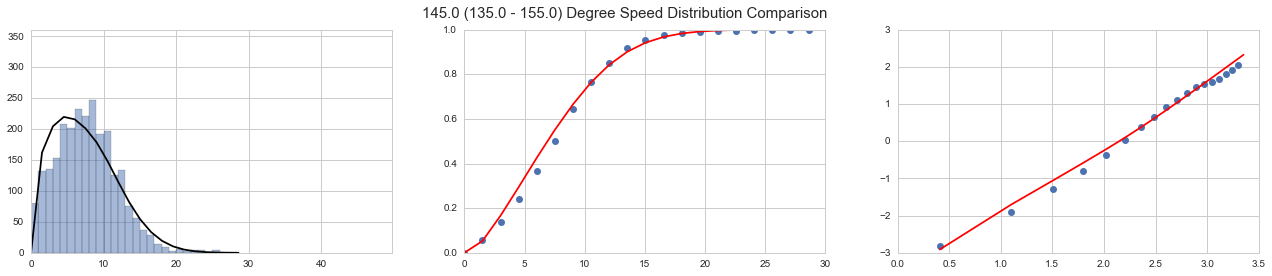

 data size: 2511
max diff: 0.0611360328297 , speed value: 6.02024352778 y gmm 0.425930935259

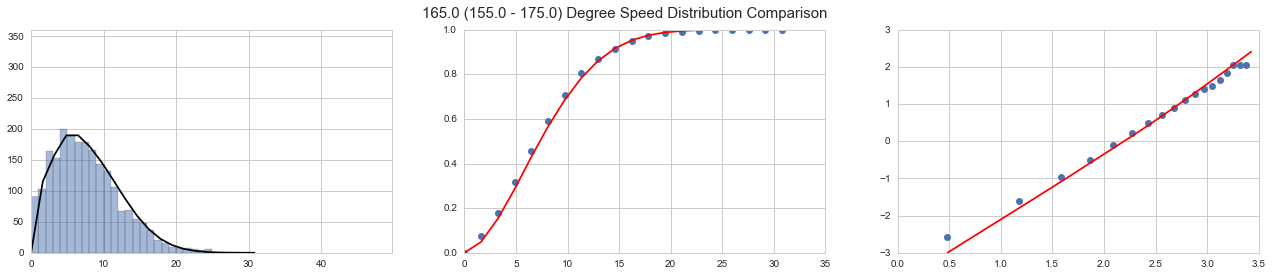

 data size: 2164
max diff: 0.0344126910722 , speed value: 4.86409835252 y gmm 0.284903390259

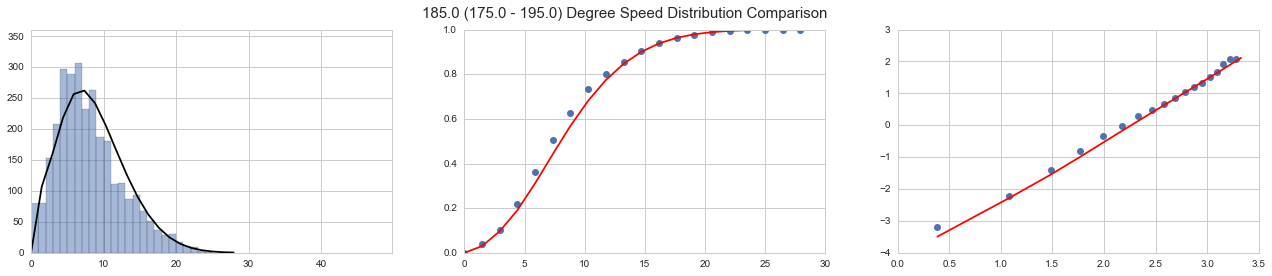

 data size: 2944
max diff: 0.0649690978214 , speed value: 7.34904370459 y gmm 0.442164054353

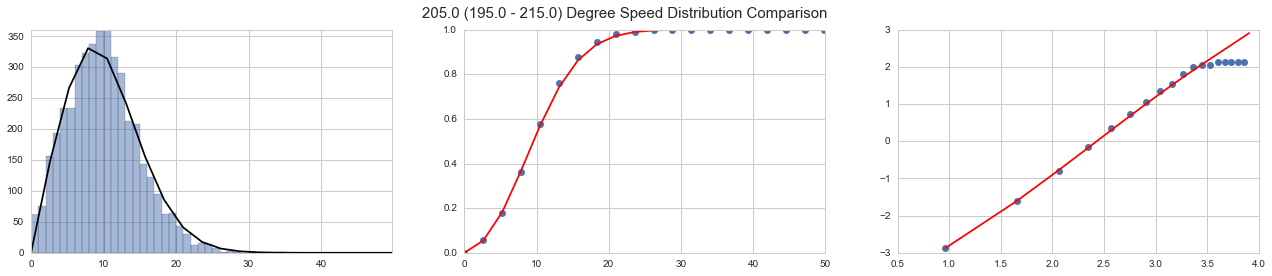

 data size: 4290
max diff: 0.0204288066193 , speed value: 13.1019207186 y gmm 0.741109654919

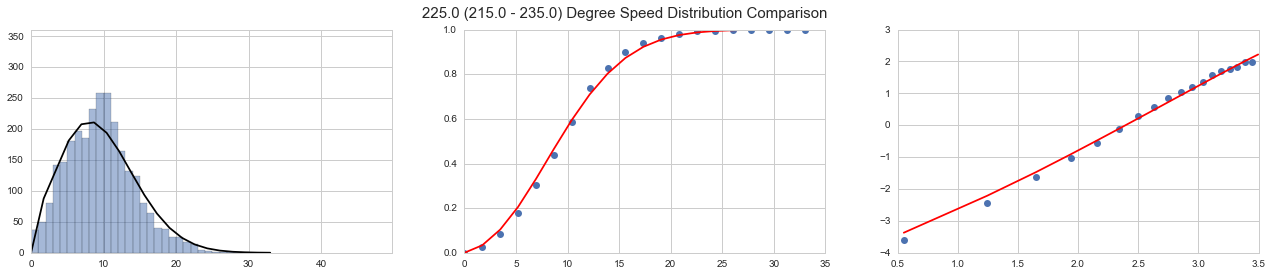

 data size: 2727
max diff: 0.0285139539341 , speed value: 15.6203967591 y gmm 0.87320955175

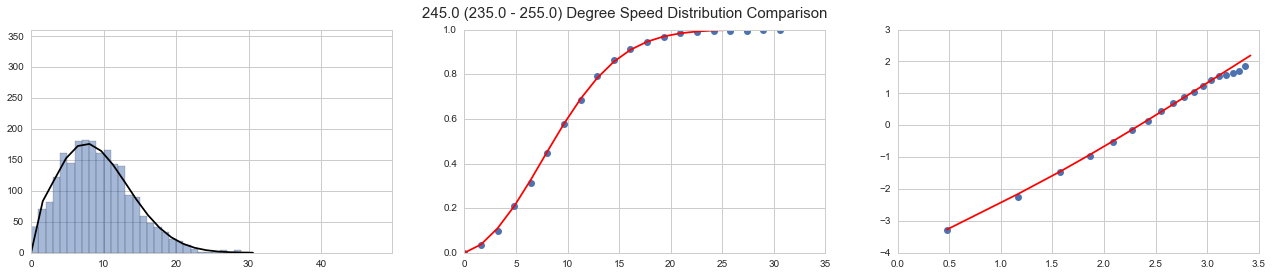

 data size: 2228
max diff: 0.0136926247219 , speed value: 6.44199425928 y gmm 0.327426915566

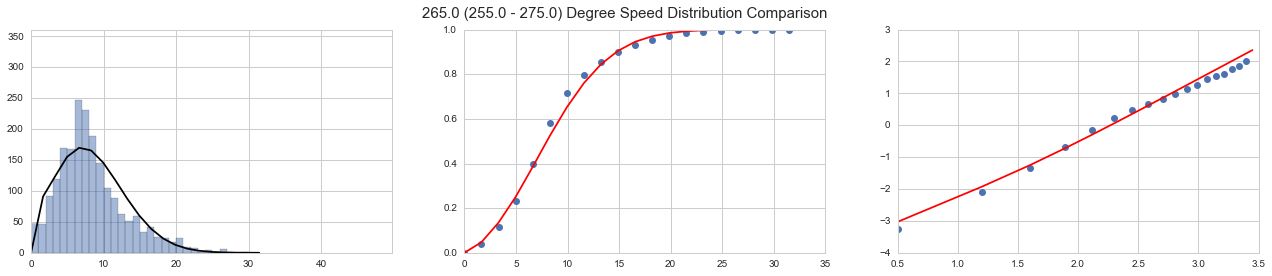

 data size: 2020
max diff: 0.0649991105053 , speed value: 9.93269377068 y gmm 0.651832572663

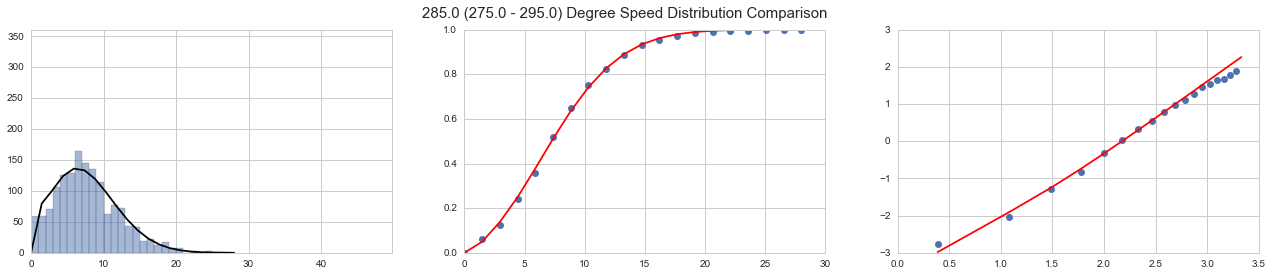

 data size: 1505
max diff: 0.0206662142819 , speed value: 5.89320267584 y gmm 0.377476845511

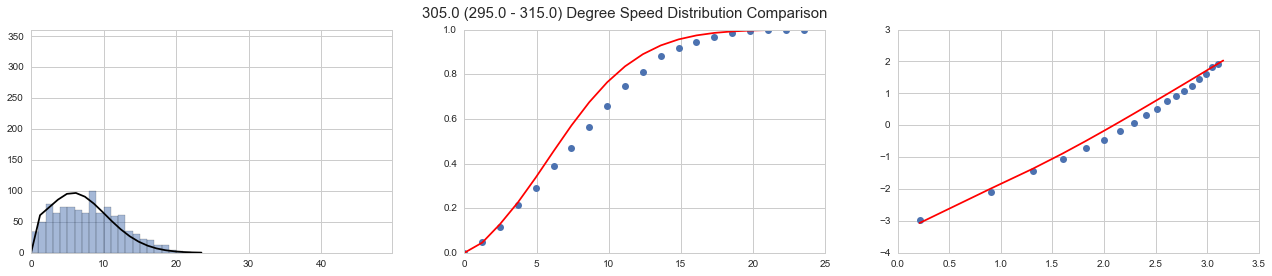

 data size: 1012
max diff: 0.11196726926 , speed value: 8.65437914514 y gmm 0.67520837598

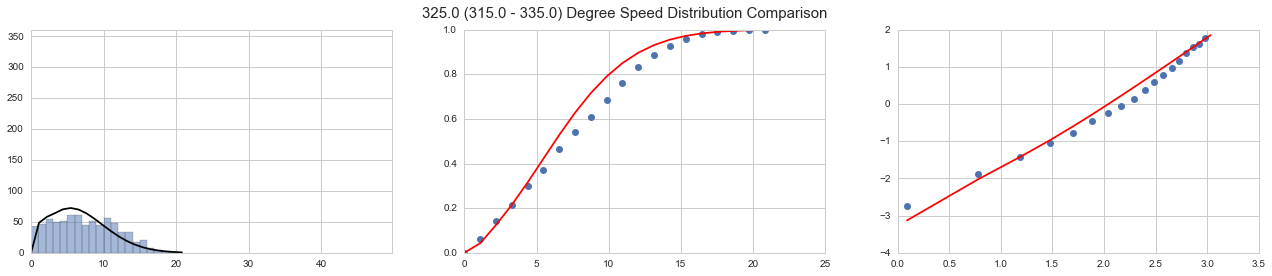

 data size: 737
max diff: 0.1051320461 , speed value: 8.75907967996 y gmm 0.715715492504

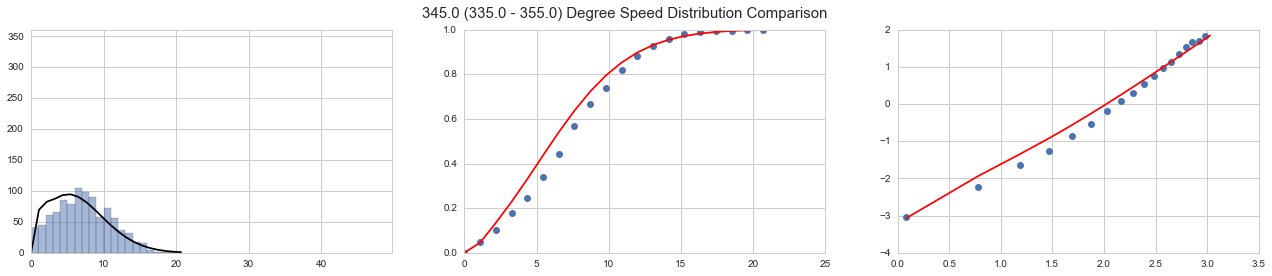

 data size: 972
max diff: 0.0970749802379 , speed value: 6.5300838707 y gmm 0.539461811514


In [53]:
if len(effective_coloumn) == 16:
    max_diff_array = model_data_comparison(df, SECTOR_LENGTH, 22.5)
else: 
    max_diff_array = model_data_comparison(df, SECTOR_LENGTH, 20)

### 5.3.1 Variance over the years

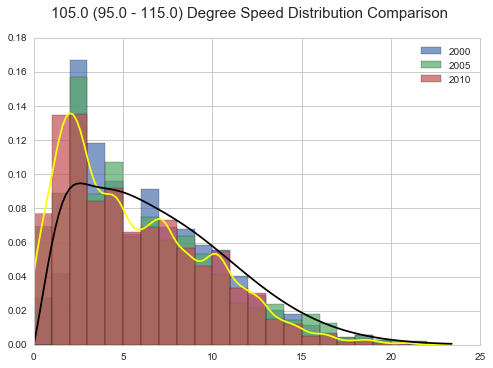

In [54]:
max_diff_element = max(max_diff_array, key=lambda x: x[1])
angle =  max_diff_angle = max_diff_element[0]
incre = 20

# Select data from observation
start_angle, end_angle = angle-incre/2, angle+incre/2
angle_radian, incre_radian = radians(angle), radians(incre)  
sub_df, max_speed = select_df_by_angle(df, start_angle, end_angle)

x_vals = arange(0, max_speed, 0.2)

# 1. 1d KDE 
sample = array(sub_df.speed).reshape(-1, 1)
sub_kde = neighbors.KernelDensity(bandwidth=0.5).fit(sample) 
y_vals = [exp(sub_kde.score_samples(x_val))
          for x_val in x_vals]
plt.plot(x_vals, y_vals,'-', color='yellow')

# 2. GMM
y_vals_ =[integrate.nquad(f, [[x_val-0.1, x_val+0.1],
                              [angle_radian-incre_radian/2, angle_radian+incre_radian/2]]) 
          for x_val in x_vals]
direction_prob = integrate.nquad(f, [[0, inf],
                                     [angle_radian-incre_radian/2, angle_radian+incre_radian/2]])
y_vals = array(zip(*y_vals_)[0])/direction_prob[0] /0.2
plt.plot(x_vals, y_vals,'-', color='black')

for start_time in xrange(20000000, 20150000, 50000):
    end_time = start_time + 50000 
    df_other_years = df_all_years.query('(date >= @start_time) & (date < @end_time)')
    df_other_years_at_angle, _ = select_df_by_angle(df_other_years, start_angle, end_angle)
    if len(df_other_years) > 0 :
        df_other_years_at_angle['speed'].hist(bins=arange(0, max_speed), 
                                              normed=True,alpha=0.7,
                                              label = str(int(start_time/10000)))

plt.suptitle('%s (%s - %s) Degree Speed Distribution Comparison' % (angle, start_angle, end_angle), 
             fontsize = 15)
plt.legend()
plt.show()

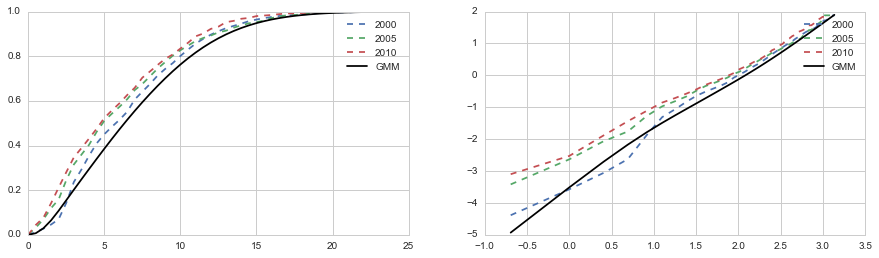

In [55]:
fig = plt.figure(figsize=(15,4))

x = arange(0, max_speed, 0.5)
for start_time in xrange(20000000, 20150000, 50000):
    end_time = start_time + 50000 
    df_other_years = df_all_years.query('(date >= @start_time) & (date < @end_time)')
    df_other_years_at_angle, _ = select_df_by_angle(df_other_years, start_angle, end_angle)
    if len(df_other_years_at_angle) > 0 :
        
        sample = df_other_years_at_angle.speed
        ecdf = sm.distributions.ECDF(sample)
        y_cdf = ecdf(x)

        ax1 = fig.add_subplot(1,2,1) 
        plt.plot(x, y_cdf,'--', label = str(int(start_time/10000)))

        ax3 = fig.add_subplot(1,2,2) 
        plt.plot(log(x), log(-log(1-y_cdf)),'--', label = str(int(start_time/10000)))
       
y_ =[integrate.nquad(f, [[0, x_val],[angle_radian-incre_radian/2, angle_radian+incre_radian/2]]) for x_val in x]
direction_prob = integrate.nquad(f, [[0, inf],[angle_radian-incre_radian/2, angle_radian+incre_radian/2]])
y_gmm = array(zip(*y_)[0])/direction_prob[0]

ax1 = fig.add_subplot(1,2,1) 
plt.plot(x, y_gmm,'-', color = 'black', label = 'GMM')
plt.legend()

ax3 = fig.add_subplot(1,2,2) 
plt.plot(log(x), log(-log(1-y_gmm)),'-', color = 'black',label = 'GMM')
plt.legend()

### 5.3.2 Bootstrap, to see the variance of each sector

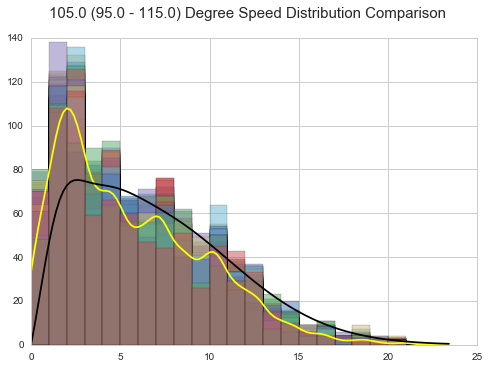

In [56]:
FRACTION = 0.5 

x_vals = arange(0, max_speed, 0.2)

# 1. 1d KDE 
sample = array(sub_df.speed).reshape(-1, 1)
sub_kde = neighbors.KernelDensity(bandwidth=0.5).fit(sample) 
y_vals = [exp(sub_kde.score_samples(x_val))*len(sub_df.speed)*FRACTION
          for x_val in x_vals]
plt.plot(x_vals, y_vals,'-', color='yellow')

#2. GMM
y_vals_ =[integrate.nquad(f, [[x_val-0.1, x_val+0.1],
                              [angle_radian-incre_radian/2, angle_radian+incre_radian/2]]) 
          for x_val in x_vals]
direction_prob = integrate.nquad(f, [[0, inf],
                                     [angle_radian-incre_radian/2, angle_radian+incre_radian/2]])
y_vals = array(zip(*y_vals_)[0])/direction_prob[0]/0.2 *len(sub_df.speed)*FRACTION
plt.plot(x_vals, y_vals,'-', color='black')

bins = arange(0, max_speed, 1)
for i in xrange(1,100):
    sub_df_resampled = sub_df.sample(frac=FRACTION, replace=True)
    sub_df_resampled['speed'].hist(bins=bins, alpha=0.5)

plt.suptitle('%s (%s - %s) Degree Speed Distribution Comparison' % (angle, start_angle, end_angle), 
             fontsize = 15)

0.170994687531 4.5 0.340340325064


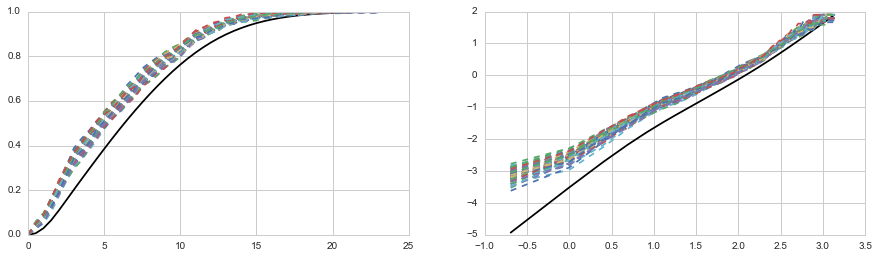

In [57]:
fig = plt.figure(figsize=(15,4))

x = arange(0, max_speed, 0.5)
y_ =[integrate.nquad(f, [[0, x_val],[angle_radian-incre_radian/2, angle_radian+incre_radian/2]]) for x_val in x]
direction_prob = integrate.nquad(f, [[0, inf],[angle_radian-incre_radian/2, angle_radian+incre_radian/2]])
y_gmm = array(zip(*y_)[0])/direction_prob[0]

ax1 = fig.add_subplot(1,2,1) 
plt.plot(x, y_gmm,'-', color = 'black')

ax3 = fig.add_subplot(1,2,2) 
plt.plot(log(x), log(-log(1-y_gmm)),'-', color = 'black')

for i in xrange(1,100):
    sub_df_resampled = sub_df.sample(frac=FRACTION, replace=True)
    
    sample = sub_df_resampled.speed
    ecdf = sm.distributions.ECDF(sample)
    y_cdf = ecdf(x)

    ax1 = fig.add_subplot(1,2,1) 
    plt.plot(x, y_cdf,'--')

    ax3 = fig.add_subplot(1,2,2) 
    plt.plot(log(x), log(-log(1-y_cdf)),'--')
    
diff = abs(y_cdf - y_gmm)
print diff.max(), x[diff.argmax()], y_gmm[diff.argmax()]

# 6. Variance of results & Cross Validation

In [58]:
from sklearn.cross_validation import train_test_split, KFold

if 'bandwidth' not in globals():
    bandwidth = DEFAULT_BANDWDITH    
    
points = FITTING_RANGE
    
def fit_gmm(df, number_of_gaussian = 3, fit_method = 'square_error'):
    # 1. Create Input, speed_set
    sample = sub_speed_set = array(zip(df.x, df.y))
    points = FITTING_RANGE
    
    # 2. KDE + EM fitting
    kde = neighbors.KernelDensity(bandwidth=bandwidth).fit(sample) 
    kde_result = exp(kde.score_samples(points))
    
    clf = mixture.GMM(n_components=number_of_gaussian, covariance_type='full')
    clf.fit(sample)
    gmm_em_result = read_gmm_em_result(clf)
        
    # 3. GMM fitting
    x0 = gmm_em_result
    bonds = [(0., 0.99),(-fit_limit, fit_limit),
             (-fit_limit, fit_limit),(0., fit_limit),(0., fit_limit),(-0.99, 0.99)]*int(len(x0)/6)
    cons = [{'type': 'eq', 'fun': lambda x: sum(x[::6]) - 1},
#             {'type': 'ineq', 'fun': lambda x: width_height_ratios_set(x) - 1/3},
#             {'type': 'ineq', 'fun': lambda x: 3 - width_height_ratios_set(x)},
           ]
 
    result = sp.optimize.minimize(
        lambda x0: GMM_fit_score(x0, kde_result, points, method=fit_method),
        x0,
        bounds = bonds,
        constraints = cons,
        tol = 0.000000000001,
        options = {"maxiter": 500})  
    
    # 4. Returns
    gmm = group_gmm_param_from_gmm_param_array(result.x)  
    mixed_model_pdf = generate_gmm_pdf_from_grouped_gmm_param(gmm)
    gmm_pdf_result = mixed_model_pdf(points)
    
    return {
        'gmm' : gmm,
        'kde_clf': kde,
        'kde_result': kde_result,
        'gmm_pdf_result': gmm_pdf_result,
        'number_of_iteration': result.nit,
    }

## 6.1 Variance of the Result

,weight,mean_x,mean_y,sig_x,sig_y,corr
1,0.787372,-2.408672,-0.853589,6.479490,6.593547,0.121464
2,0.170679,-2.691506,0.294670,7.153852,5.280617,0.882093
3,0.041949,-0.110120,0.665121,1.200000,1.256706,-0.012359


GMM Plot Result
0.787372058431 [[-2.40867212 -0.85358902]] [ 6.12264325  6.92617412] 139.087808832
0.170678973466 [[-2.69150595  0.29467041]] [ 2.05719756  8.65045965] -54.632329899
0.0419489681022 [[-0.11012029  0.66512104]] [ 1.19897849  1.25768028] -172.51009323


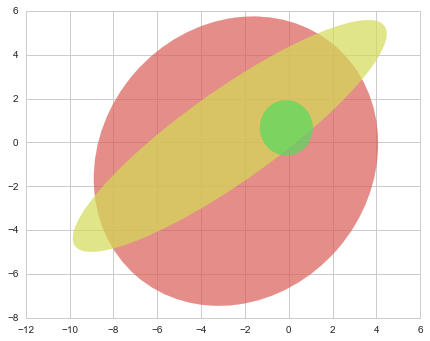

,Chi_square,K_S,MSE,RMSE / Max,RMSE / Mean,R_square
0,0.025898,0.009932,1.693850e-08,0.016086,0.162767,0.986492


,weight,mean_x,mean_y,sig_x,sig_y,corr
1,0.798813,-2.335509,-0.927109,6.486826,6.630888,0.129889
2,0.155724,-2.842750,0.097203,6.955445,5.049773,0.874298
3,0.045463,-0.094615,0.702662,1.254660,1.236940,-0.032000


GMM Plot Result
0.798812692984 [[-2.33550852 -0.92710944]] [ 6.11207777  6.9778285 ] 139.799574577
0.15572413924 [[-2.8427505   0.09720347]] [ 2.04194241  8.34918522] -55.2153099169
0.0454631677754 [[-0.09461494  0.70266173]] [ 1.22382577  1.26745551] -123.017100585


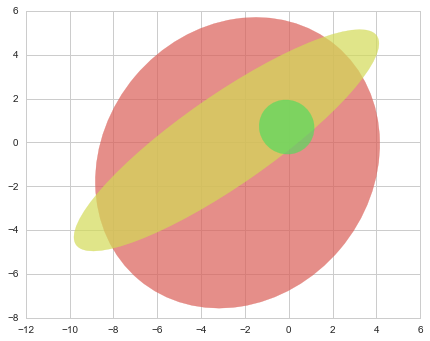

,Chi_square,K_S,MSE,RMSE / Max,RMSE / Mean,R_square
0,0.025766,0.008302,1.721510e-08,0.015712,0.163993,0.986365


,weight,mean_x,mean_y,sig_x,sig_y,corr
1,0.786857,-2.441978,-0.889934,6.420156,6.639537,0.108970
2,0.169778,-2.896303,0.216963,7.066599,5.200160,0.880755
3,0.043365,-0.088437,0.665688,1.208429,1.253344,-0.010932


GMM Plot Result
0.786856514387 [[-2.44197753 -0.88993446]] [ 6.14735782  6.89288333] 143.56985417
0.169778139441 [[-2.89630327  0.21696316]] [ 2.03933701  8.53343952] -54.7392614093
0.0433653461716 [[-0.08843715  0.66568831]] [ 1.20742486  1.25431176] -171.663751143


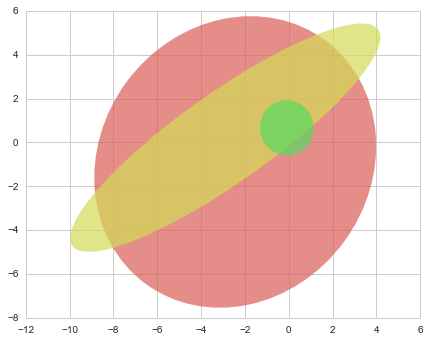

,Chi_square,K_S,MSE,RMSE / Max,RMSE / Mean,R_square
0,0.027401,0.010138,1.815712e-08,0.01646,0.16836,0.985627


,weight,mean_x,mean_y,sig_x,sig_y,corr
1,0.793963,-2.269059,-0.898672,6.539985,6.655534,0.146945
2,0.160205,-3.218081,0.076819,7.046431,5.189927,0.880191
3,0.045832,-0.152777,0.684254,1.240977,1.236617,-0.004449


GMM Plot Result
0.793962997186 [[-2.26905877 -0.89867191]] [ 6.09035226  7.06931002] 138.398565571
0.160204997173 [[-3.21808065  0.07681895]] [ 2.03949984  8.51046276] -54.7181276003
0.0458320056411 [[-0.15277732  0.68425423]] [ 1.23528032  1.24230807] -115.8290026


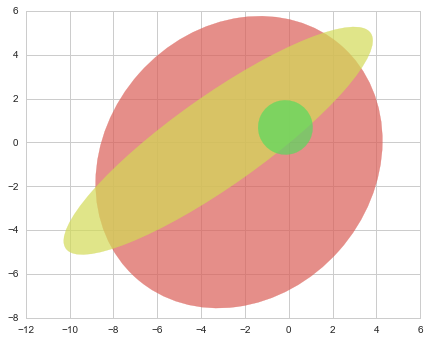

,Chi_square,K_S,MSE,RMSE / Max,RMSE / Mean,R_square
0,0.026353,0.010103,1.819452e-08,0.016274,0.168714,0.98549


,weight,mean_x,mean_y,sig_x,sig_y,corr
1,0.791109,-2.353102,-0.829278,6.642680,6.657673,0.139511
2,0.162654,-3.178045,0.065753,6.588137,5.066824,0.874980
3,0.046237,-0.163158,0.597530,1.197611,1.275047,0.006975


GMM Plot Result
0.791108832134 [[-2.35310236 -0.82927836]] [ 6.16881339  7.09898253] 135.462933044
0.16265427955 [[-3.17804474  0.06575329]] [ 2.0036571   8.06607769] -53.4423266797
0.0462368883159 [[-0.16315781  0.59752988]] [ 1.19736461  1.27527844] 176.825924844


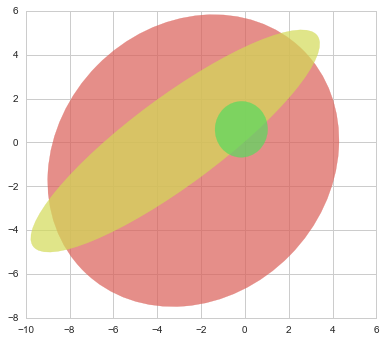

,Chi_square,K_S,MSE,RMSE / Max,RMSE / Mean,R_square
0,0.02633,0.00873,1.769046e-08,0.015985,0.166482,0.985938


,weight,mean_x,mean_y,sig_x,sig_y,corr
1,0.811281,-2.386264,-0.740930,6.510278,6.597692,0.156171
2,0.147833,-2.994267,0.064839,6.599502,4.877165,0.874275
3,0.040886,-0.140414,0.626865,1.169395,1.245614,-0.000770


GMM Plot Result
0.811280811898 [[-2.38626368 -0.7409303 ]] [ 6.01865776  7.04904367] 137.44083363
0.147832841538 [[-2.99426712  0.06483917]] [ 1.96080477  7.96840045] -54.6761045394
0.0408863465632 [[-0.14041438  0.62686507]] [ 1.16939214  1.2456163 ] -179.650824371


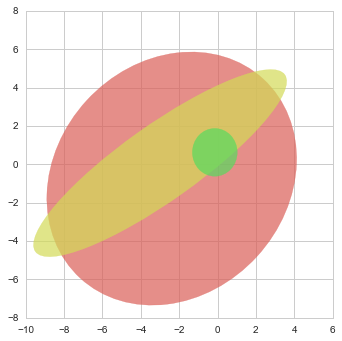

,Chi_square,K_S,MSE,RMSE / Max,RMSE / Mean,R_square
0,0.026093,0.009408,1.803538e-08,0.016566,0.16783,0.985724


,weight,mean_x,mean_y,sig_x,sig_y,corr
1,0.802596,-2.433628,-0.953110,6.513408,6.655734,0.156025
2,0.154966,-3.097627,0.060380,6.919405,5.089848,0.877975
3,0.042438,-0.083597,0.613426,1.189032,1.234835,-0.002640


GMM Plot Result
0.802596094656 [[-2.43362801 -0.95310994]] [ 6.04426204  7.08450278] 138.944098147
0.154965835597 [[-3.09762688  0.06037956]] [ 2.01931498  8.34907685] -54.7796626914
0.0424380697462 [[-0.08359746  0.6134261 ]] [ 1.18897493  1.2348902 ] -178.002559035


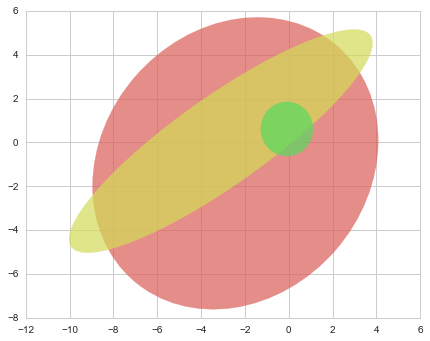

,Chi_square,K_S,MSE,RMSE / Max,RMSE / Mean,R_square
0,0.027897,0.00974,1.727305e-08,0.01615,0.164277,0.986067


,weight,mean_x,mean_y,sig_x,sig_y,corr
1,0.809023,-2.394464,-0.835617,6.519858,6.683212,0.142290
2,0.152905,-2.673574,0.404388,6.589940,4.963071,0.886883
3,0.038072,-0.054153,0.653704,1.190466,1.221044,0.003885


GMM Plot Result
0.809023455477 [[-2.39446366 -0.83561716]] [ 6.10686307  7.06258365] 139.933425397
0.152904623399 [[-2.67357358  0.40438798]] [ 1.8811304   8.03247954] -53.9756705243
0.0380719211242 [[-0.05415324  0.65370363]] [ 1.19028561  1.22122003] 175.646302835


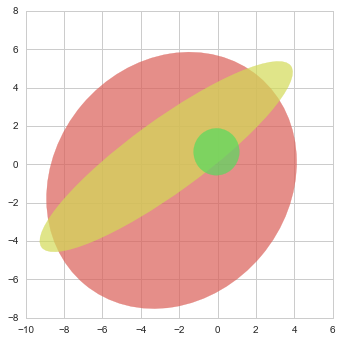

,Chi_square,K_S,MSE,RMSE / Max,RMSE / Mean,R_square
0,0.02602,0.010057,1.706930e-08,0.016634,0.16334,0.986099


,weight,mean_x,mean_y,sig_x,sig_y,corr
1,0.816268,-2.414780,-0.875063,6.510941,6.599108,0.155986
2,0.137572,-3.096471,0.099906,7.041771,5.257915,0.893732
3,0.046160,-0.175044,0.699288,1.244578,1.275166,-0.017091


GMM Plot Result
0.816267720457 [[-2.41478014 -0.87506304]] [ 6.02023605  7.0496334 ] 137.464244255
0.137571867725 [[-3.09647088  0.09990592]] [ 1.93766486  8.5719114 ] -54.1709225785
0.0461604118183 [[-0.17504359  0.69928824]] [ 1.24112261  1.2785287 ] -162.430471375


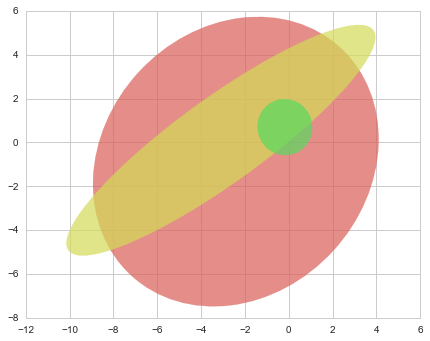

,Chi_square,K_S,MSE,RMSE / Max,RMSE / Mean,R_square
0,0.027612,0.010125,1.838584e-08,0.01658,0.169482,0.985253


,weight,mean_x,mean_y,sig_x,sig_y,corr
1,0.812446,-2.369338,-0.841469,6.486624,6.578911,0.141164
2,0.145522,-3.065637,0.069483,6.886110,5.221412,0.902238
3,0.042032,-0.073425,0.629446,1.202236,1.251332,0.048210


GMM Plot Result
0.812446134062 [[-2.36933766 -0.84146862]] [ 6.05185478  6.98093261] 137.857538379
0.145521580585 [[-3.06563728  0.0694826 ]] [ 1.83612538  8.44454237] -53.6288142391
0.0420322853533 [[-0.07342539  0.62944638]] [ 1.18799301  1.26486236] 154.854036167


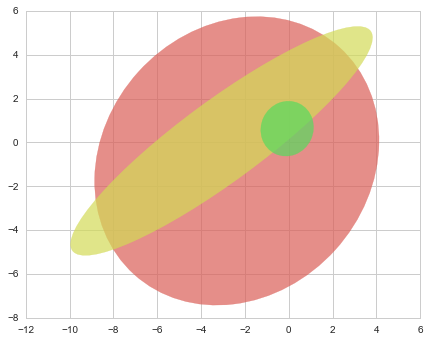

,Chi_square,K_S,MSE,RMSE / Max,RMSE / Mean,R_square
0,0.02694,0.008356,1.928486e-08,0.017151,0.17348,0.984632


In [59]:
for i in range(10):
    df_resampled = df.sample(frac=1, replace=True)
    result = fit_gmm(df_resampled, NUMBER_OF_GAUSSIAN, fit_method = FIT_METHOD)
    display(pretty_print_gmm(result['gmm']))
    plot_gmm_ellipses(result['gmm'])
    pretty_pd_display([goodness_of_fit_summary(result['gmm_pdf_result'], result['kde_result'])])

## 6.2 Cross validation, to select the number of Gaussian

In [60]:
## 5-fold cross validation
gaussian_number_range = arange(1,7)
CV_result_train_all,CV_result_test_all =[],[]
number_of_fold = 4
print 'Number of train/test dataset', len(df)*(number_of_fold-1)/number_of_fold, len(df)/number_of_fold

for number_of_gaussian in gaussian_number_range:
    print '  '
    print 'Number of gaussian', number_of_gaussian
    
    kf = KFold(len(df), n_folds=number_of_fold, shuffle=True) 

    CV_result_train, CV_result_test = [],[]
    for train_index, test_index in kf:
        sub_df, sub_df_test = df.iloc[train_index], df.iloc[test_index]

        # 1. Train
        result = fit_gmm(sub_df, number_of_gaussian, fit_method = FIT_METHOD)
        gmm_pdf_result_train = result['gmm_pdf_result']
        kde_result_train = result['kde_result']

        # 2. Validate
        # GMM from Train - KDE from Test
        sample = array(zip(sub_df_test.x, sub_df_test.y))
        kde_test = neighbors.KernelDensity(bandwidth=bandwidth).fit(sample) 
        kde_result_test = exp(kde_test.score_samples(points))

        gof_train = goodness_of_fit_summary(gmm_pdf_result_train, 
                                            kde_result_train,)
        gof_test =  goodness_of_fit_summary(gmm_pdf_result_train, 
                                            kde_result_test,)
                
        CV_result_train.append(gof_train)
        CV_result_test.append(gof_test)
        
    CV_result_train_all.append(CV_result_train)
    CV_result_test_all.append(CV_result_test)
    
    print 'Train'
    pretty_pd_display(CV_result_train)
    print 'Test'
    pretty_pd_display(CV_result_test)

Number of train/test dataset 25692.0 8564.0
  
Number of gaussian 1
Train


,Chi_square,K_S,MSE,RMSE / Max,RMSE / Mean,R_square
0,0.075085,0.032358,1.294812e-07,0.044223,0.450141,0.895360
1,0.074119,0.032412,1.293220e-07,0.044423,0.449282,0.896179
2,0.075088,0.033694,1.305254e-07,0.044745,0.451789,0.894893
3,0.070808,0.032499,1.252456e-07,0.043840,0.442419,0.899212


Test


,Chi_square,K_S,MSE,RMSE / Max,RMSE / Mean,R_square
0,0.076711,0.026629,1.290146e-07,0.045077,0.448286,0.897523
1,0.079218,0.037772,1.288323e-07,0.044349,0.449711,0.895518
2,0.076477,0.040661,1.324198e-07,0.044618,0.454652,0.893675
3,0.089795,0.027082,1.384417e-07,0.045590,0.465312,0.888630


  
Number of gaussian 2
Train


,Chi_square,K_S,MSE,RMSE / Max,RMSE / Mean,R_square
0,0.071609,0.017279,3.361417e-08,0.022507,0.229183,0.973006
1,0.069750,0.017562,3.303067e-08,0.022580,0.227324,0.973354
2,0.072883,0.016964,3.326325e-08,0.022644,0.228078,0.972957
3,0.077636,0.018227,3.451107e-08,0.022851,0.232133,0.972456


Test


,Chi_square,K_S,MSE,RMSE / Max,RMSE / Mean,R_square
0,0.085118,0.020124,3.921583e-08,0.024938,0.247705,0.968296
1,0.086224,0.018239,3.780306e-08,0.023617,0.242756,0.969780
2,0.067037,0.018188,3.879772e-08,0.023975,0.246075,0.969715
3,0.094751,0.022465,3.741333e-08,0.024209,0.242219,0.969190


  
Number of gaussian 3
Train


,Chi_square,K_S,MSE,RMSE / Max,RMSE / Mean,R_square
0,0.024995,0.010238,1.611292e-08,0.015552,0.158737,0.987002
1,0.024912,0.009125,1.744780e-08,0.016289,0.165057,0.985942
2,0.025304,0.009717,1.713161e-08,0.016452,0.163679,0.986192
3,0.025580,0.009793,1.805609e-08,0.016483,0.168008,0.985512


Test


,Chi_square,K_S,MSE,RMSE / Max,RMSE / Mean,R_square
0,0.032627,0.017336,2.580967e-08,0.020354,0.200717,0.979399
1,0.031955,0.011580,1.941997e-08,0.017307,0.174503,0.984420
2,0.029648,0.010392,2.298771e-08,0.017812,0.189424,0.981608
3,0.032486,0.022655,2.110798e-08,0.018340,0.181608,0.982891


  
Number of gaussian 4
Train


,Chi_square,K_S,MSE,RMSE / Max,RMSE / Mean,R_square
0,0.025950,0.007929,1.335144e-08,0.014288,0.144393,0.989304
1,0.026757,0.008222,1.359443e-08,0.014298,0.145718,0.989049
2,0.028045,0.008162,1.453062e-08,0.014969,0.150794,0.988312
3,0.026668,0.007702,1.340909e-08,0.014324,0.144816,0.989141


Test


,Chi_square,K_S,MSE,RMSE / Max,RMSE / Mean,R_square
0,0.033759,0.015630,1.920878e-08,0.017075,0.173531,0.984333
1,0.037124,0.010712,1.947998e-08,0.017634,0.174690,0.984383
2,0.036091,0.015403,1.570531e-08,0.015246,0.156412,0.987346
3,0.032955,0.014869,1.950628e-08,0.017185,0.174465,0.984601


  
Number of gaussian 5
Train


,Chi_square,K_S,MSE,RMSE / Max,RMSE / Mean,R_square
0,0.019290,0.009547,6.886320e-09,0.010344,0.103801,0.994437
1,0.015647,0.008157,7.067685e-09,0.010435,0.105078,0.994300
2,0.011769,0.009775,6.807190e-09,0.010155,0.103174,0.994522
3,0.015272,0.007764,7.085294e-09,0.010295,0.105191,0.994320


Test


,Chi_square,K_S,MSE,RMSE / Max,RMSE / Mean,R_square
0,0.025366,0.009472,1.377595e-08,0.014120,0.146521,0.989053
1,0.025980,0.008876,1.463219e-08,0.014734,0.151360,0.988326
2,0.022188,0.012937,1.499569e-08,0.015296,0.153001,0.987937
3,0.025176,0.012219,1.288111e-08,0.014457,0.142083,0.989522


  
Number of gaussian 6
Train


,Chi_square,K_S,MSE,RMSE / Max,RMSE / Mean,R_square
0,0.009149,0.004534,3.619148e-09,0.007289,0.075189,0.997128
1,0.010024,0.005812,3.365905e-09,0.007277,0.072551,0.997273
2,0.008008,0.005399,2.672234e-09,0.006494,0.064627,0.997819
3,0.007284,0.004393,2.846901e-09,0.006514,0.066717,0.997721


Test


,Chi_square,K_S,MSE,RMSE / Max,RMSE / Mean,R_square
0,0.015803,0.014288,9.929343e-09,0.013082,0.124705,0.991681
1,0.014210,0.005316,7.645726e-09,0.010336,0.109247,0.993975
2,0.019701,0.010485,1.195812e-08,0.012869,0.136729,0.990788
3,0.019903,0.014681,1.288718e-08,0.014546,0.141871,0.989493


In [61]:
train_scores_mean, train_scores_std = generate_mean_std_gof(CV_result_train_all)
print 'Train gof mean, std'
display(train_scores_mean)

test_scores_mean, test_scores_std = generate_mean_std_gof(CV_result_test_all)
print 'Test gof mean, std'
display(test_scores_mean)

Train gof mean, std


,Chi_square,K_S,MSE,RMSE / Max,RMSE / Mean,R_square
0,0.073775,0.032741,1.286436e-07,0.044308,0.448408,0.896411
1,0.072970,0.017508,3.360479e-08,0.022646,0.229180,0.972943
2,0.025198,0.009718,1.718711e-08,0.016194,0.163870,0.986162
3,0.026855,0.008004,1.372140e-08,0.014470,0.146430,0.988951
4,0.015494,0.008811,6.961622e-09,0.010308,0.104311,0.994395
5,0.008616,0.005035,3.126047e-09,0.006893,0.069771,0.997485


Test gof mean, std


,Chi_square,K_S,MSE,RMSE / Max,RMSE / Mean,R_square
0,0.080550,0.033036,1.321771e-07,0.044908,0.454490,0.893837
1,0.083283,0.019754,3.830749e-08,0.024185,0.244689,0.969245
2,0.031679,0.015491,2.233133e-08,0.018453,0.186563,0.982079
3,0.034982,0.014154,1.847509e-08,0.016785,0.169775,0.985166
4,0.024678,0.010876,1.407124e-08,0.014652,0.148241,0.988710
5,0.017404,0.011193,1.060509e-08,0.012708,0.128138,0.991484


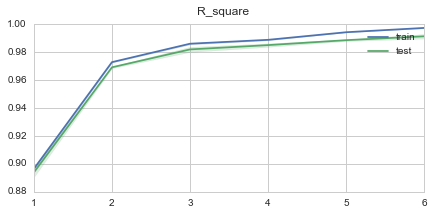

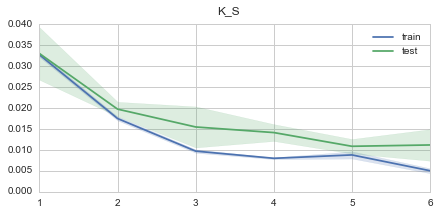

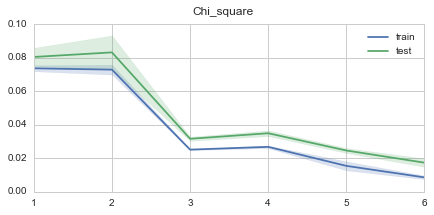

In [62]:
prop_cycle=sns.color_palette()
for column in ['R_square','K_S','Chi_square', ]:
    fig, ax = plt.subplots()
    fig.set_size_inches(7, 3)
    plt.plot(gaussian_number_range, train_scores_mean[column],
             '-', label = 'train', color=prop_cycle[0])
    plt.fill_between(gaussian_number_range, 
                     train_scores_mean[column] - train_scores_std[column],
                     train_scores_mean[column] + train_scores_std[column], 
                     alpha=0.2, color=prop_cycle[0])
    
    plt.plot(gaussian_number_range, test_scores_mean[column],
             '-', label = 'test',color=prop_cycle[1])
    plt.fill_between(gaussian_number_range, 
                 test_scores_mean[column] - test_scores_std[column],
                 test_scores_mean[column] + test_scores_std[column], 
                 alpha=0.2,color=prop_cycle[1])
    plt.suptitle(column)
    plt.xticks(gaussian_number_range)
    plt.legend()
    plt.show()

## 6.3 Variance of KDE

In [63]:
sss

NameError: name 'sss' is not defined

In [ ]:
gmm1 = [0.552104,-0.055681,2.256591,2.757752,2.731348,0.034628,
        0.372591,2.376362,-2.098443,1.621717,2.213625,-0.01429,
        0.055879,1.009152,-1.430799,2.10049,0.808011,0.08083,
        0.019425,-0.432981,2.574572,0.784784,0.796954,-0.020531]

gmm2 = [0.552104,-0.055681,2.256591,2.757752,2.731348,0.034628,
        0.372591,2.376362,-2.098443,1.621717,2.213625,-0.01429,]

gmm3 = [0.552104,-0.055681,2.256591,2.757752,2.731348,0.034628,]

gmms = [gmm1,gmm2,gmm3]
pdfs =[]

for gmm in gmms:
    plot_gmm_ellipses(gmm)
    gmm = group_gmm_param_from_gmm_param_array(gmm) 
    mixed_model_pdf = generate_gmm_pdf_from_grouped_gmm_param(gmm)
    X = Y = PLOT_AXIS_RANGE
    pdf_Z = generate_Z_from_X_Y(X,Y, mixed_model_pdf)# passing a function as an argument
    pdfs.append(pdf_Z)
    plot_2d_prob_density(X,Y,pdf_Z)

In [ ]:
plot_2d_prob_density(X,Y,pdfs[0]-pdfs[1])

In [ ]:
for start_time in xrange(20000000, 20150000, 50000):
    end_time = start_time + 50000 
    sub_df = df_all_years.query('(date >= @start_time) & (date < @end_time)')
    sample = sub_speed_set = array(zip(sub_df.x, sub_df.y))
    points = FITTING_RANGE
    
    # 2. KDE + EM fitting
    kde = neighbors.KernelDensity(bandwidth=bandwidth).fit(sample) 
    
    X = Y = PLOT_AXIS_RANGE
    kde_Z = generate_Z_from_X_Y(X,Y, lambda coords: exp(kde.score_samples(coords)))
    fig, ax = plt.subplots()
    fig.set_size_inches(14, 4)
    plot_2d_prob_density(X,Y,kde_Z,ax)
    plt.show()
#     plot_speed_and_angle_distribution(sub_df.speed, sub_df.dir)

In [ ]:
# 5-fold cross validation
gaussian_number_range = arange(3,5)
CV_result_train_all,CV_result_test_all =[],[]
number_of_fold = 4
print 'Number of train/test dataset', len(df)*(number_of_fold-1)/number_of_fold, len(df)/number_of_fold

for number_of_gaussian in gaussian_number_range:
    print '  '
    print 'Number of gaussian', number_of_gaussian
    
    kf = KFold(len(df), n_folds=number_of_fold, shuffle=True) 

    CV_result_train, CV_result_test = [],[]
    for train_index, test_index in kf:
        sub_df, sub_df_test = df.iloc[train_index], df.iloc[test_index]

        # 1. Train
        result = fit_gmm(sub_df, number_of_gaussian, fit_method = FIT_METHOD)
        gmm_pdf_result_train = result['gmm_pdf_result']
        kde_train = result['kde_clf']
        kde_result_train = result['kde_result']

        # 2. Validate
        # GMM from Train - KDE from Test
        sample = array(zip(sub_df_test.x, sub_df_test.y))
        kde_test = neighbors.KernelDensity(bandwidth=bandwidth).fit(sample) 
        kde_result_test = exp(kde_test.score_samples(points))

        gof_train = goodness_of_fit_summary(gmm_pdf_result_train, 
                                            kde_result_train,)
        gof_test =  goodness_of_fit_summary(gmm_pdf_result_train, 
                                            kde_result_test,)
                
        # Plot jPDF
        X = Y = PLOT_AXIS_RANGE
        kde_train_Z = generate_Z_from_X_Y(X,Y, lambda coords: exp(kde_train.score_samples(coords)))
        fig = plt.figure(figsize=(22,6))
        ax1 = fig.add_subplot(1,3,1)
        plot_2d_prob_density(X,Y,kde_train_Z, ax1)
        
        ax2 = fig.add_subplot(1,3,2)
        kde_test_Z = generate_Z_from_X_Y(X,Y, lambda coords: exp(kde_test.score_samples(coords)))
        plot_2d_prob_density(X,Y,kde_test_Z, ax2)
            
        ax3 = fig.add_subplot(1,3,3)
        plot_2d_prob_density(X,Y,kde_train_Z-kde_test_Z,ax3)
        
        pretty_pd_display([gof_train, gof_test], index=["gof_train", "gof_test"]))
        